# *FaunaScope*

**Autor:** Juan Carlos Ramírez Gil  
**Fecha:** 7 de noviembre de 2025  
**Proyecto:** AVES_MAMIFEROS 
**Software:** Python 3.14 + Jupyter Notebook  
---


# Introduccion

Este código corresponde a u análisis estadístico de la diversidad par aves y mamíferos en la parte alta de cuenca del rio zulia en el departamento de norte de Santander como parte de una prestacion de servicios profesionales en Biologia (Fauna), el siguiente código integra Python desde visual code  para crear un código de análisis reproducible y moderno que permita ahorrar el trabajo de análisis en proyectos futuros.

## Crear repositorio en GitHub para guardar el proyecto

El proyecto sera guardado en un repositorio de github para poder darle trazabilidad al mismo y compartirlo libremente la siguiente linea de codigo permite guardarlo en automatico ejecutando #### auto_commit.py


In [ ]:
import subprocess
from datetime import datetime

def ejecutar_comando(comando):
    """Ejecuta un comando del sistema y muestra la salida en consola."""
    try:
        resultado = subprocess.run(
            comando,
            check=True,
            text=True,
            capture_output=True
        )
        print(resultado.stdout)
    except subprocess.CalledProcessError as e:
        print(f"⚠️ Error ejecutando comando: {comando}")
        print(e.stderr)

def auto_commit():
    """Agrega, commitea y sube los cambios automáticamente al repositorio."""
    
    # 🕒 1️⃣ Generar mensaje con fecha y hora
    fecha = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    mensaje = f"Auto-commit: actualización {fecha}"

    print("🔍 Verificando estado del repositorio...")
    ejecutar_comando(["git", "status"])

    print("➕ Agregando todos los cambios al área de preparación...")
    ejecutar_comando(["git", "add", "."])

    print(f"💾 Realizando commit con mensaje: '{mensaje}'")
    ejecutar_comando(["git", "commit", "-m", mensaje])

    print("🚀 Subiendo cambios al repositorio remoto (rama master)...")
    ejecutar_comando(["git", "push", "origin", "master"])


# Analisis de datos
Hay que recordar que se trabajara desde python, utilizando pandas y leyendo archivos xlsx, para esto se aplicar un paquete especifico que lea el documento

In [ ]:
#--------------## Cargar librerias necesarias------------------------------

# Si no las tienes instaladas, ejecuta esta celda una vez:
# Salir del interprete con: exit()

# !pip install pandas numpy matplotlib tabulate openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import openpyxl

#--------------## Leer archivo ------------------------------
# Ruta del archivo
ruta = r"D:\CORPONOR 2025\Backet\python_Proyect\data\POF_ZULIA_2025_BD_AVES_MAMIFEROS.xlsx"

# Leer el archivo Excel
Registros = pd.read_excel(ruta)

# Mostrar las primeras filas
print("📄 Primeras filas del archivo:")
print(Registros.head())

# Mostrar nombres de las columnas
print("\n📋 Columnas del DataFrame:")
print(Registros.columns)

📄 Primeras filas del archivo:
  CLASE                  ESPECIE                       SACC  INDIVIDUOS  \
0  AVES          Tyrannus savana     Fork-tailed Flycatcher         2.0   
1  AVES    Molothrus bonariensis              Shiny Cowbird         4.0   
2  AVES         Buteo brachyurus          Short-tailed Hawk         2.0   
3  AVES    Parabuteo leucorrhous          White-rumped Hawk         1.0   
4  AVES  Saucerottia saucerottei  Steely-vented Hummingbird         3.0   

  Conglomerado METODOLOGIA     METODO                 ID  Hora_Hombre  \
0          C10    Auditivo  Transecto  AM-C10-BDA-ARB-T1          6.0   
1          C10  Fotografia  Transecto  AM-C10-BDA-ARB-T1          6.0   
2          C11    Auditivo  Transecto  AM-C11-BDB-BOC-T1          6.0   
3          C11    Auditivo  Transecto  AM-C11-BDB-BOC-T1          6.0   
4          C11  Fotografia  Transecto  AM-C11-BDB-BOC-T1          6.0   

   MUNICIPIO  ...                            Autor  \
0  ARBOLEDAS  ...         

# Metodologia


A continuación, se describen los análisis realizados sobre la información obtenida durante el muestreo de fauna.


## Esfuerzo de Muestreo
El esfuerzo de muestreo (E) se estimó de acuerdo con la metodología empleada y las características del grupo taxonómico evaluado, considerando la relación entre el número de unidades de muestreo, el tiempo efectivo de muestreo y, cuando aplicó, el número de observadores o dispositivos utilizados. En términos generales, el esfuerzo se calculó multiplicando el número de unidades de muestreo (trampas, redes, cámaras, transectos o puntos de observación) por el tiempo de exposición o duración de cada sesión de muestreo (horas, días o noches), ajustado al número de personas o equipos activos en campo. Esta aproximación permite estandarizar la intensidad del muestreo entre diferentes métodos y grupos biológicos, facilitando la comparación de resultados y la estimación del éxito de muestreo (Em), definido como la razón entre el número total de registros obtenidos y el esfuerzo total aplicado para cada técnica.

##### En primera instancia se revisa el contenido de las columas a utilizar en el analisis

In [ ]:
#--------------## Leer archivo y revisar columnas------------------------------
# Ruta del archivo
ruta = r"D:\CORPONOR 2025\Backet\python_Proyect\data\POF_ZULIA_2025_BD_AVES_MAMIFEROS.xlsx"

# Leer el archivo Excel
Registros = pd.read_excel(ruta)

# Mostrar las primeras filas
print("📄 Primeras filas del archivo:")
print(Registros.head())

# Mostrar nombres de las columnas
print("\n📋 Columnas del DataFrame:")
print(Registros.columns)

# Mostrar valores únicos de algunas columnas
for col in ["METODOLOGIA", "METODO", "ID", "Gremio"]:
    if col in Registros.columns:
        print(f"\n🔹 Valores únicos en '{col}':")
        print(Registros[col].unique())
    else:
        print(f"\n⚠️ La columna '{col}' no existe en el DataFrame.")

📄 Primeras filas del archivo:
  CLASE                  ESPECIE                       SACC  INDIVIDUOS  \
0  AVES          Tyrannus savana     Fork-tailed Flycatcher         2.0   
1  AVES    Molothrus bonariensis              Shiny Cowbird         4.0   
2  AVES         Buteo brachyurus          Short-tailed Hawk         2.0   
3  AVES    Parabuteo leucorrhous          White-rumped Hawk         1.0   
4  AVES  Saucerottia saucerottei  Steely-vented Hummingbird         3.0   

  Conglomerado METODOLOGIA     METODO                 ID  Hora_Hombre  \
0          C10    Auditivo  Transecto  AM-C10-BDA-ARB-T1          6.0   
1          C10  Fotografia  Transecto  AM-C10-BDA-ARB-T1          6.0   
2          C11    Auditivo  Transecto  AM-C11-BDB-BOC-T1          6.0   
3          C11    Auditivo  Transecto  AM-C11-BDB-BOC-T1          6.0   
4          C11  Fotografia  Transecto  AM-C11-BDB-BOC-T1          6.0   

   MUNICIPIO  ...                            Autor  \
0  ARBOLEDAS  ...         

#### Crear tabla de esfuerzo de muestreo

In [ ]:
#--------------## Esfuerzo de Muestreo------------------------------

import pandas as pd
from tabulate import tabulate

# --- Copiar dataframe base ---
df = Registros.copy()

# --- Normalizar texto ---
df['METODO'] = df['METODO'].astype(str).str.strip()
df['COBERTURA'] = df['COBERTURA'].astype(str).str.strip()
df['ID'] = df['ID'].astype(str).str.strip()

# --- Diccionario de abreviaciones de coberturas ---
abreviaciones_cobertura = {
    'Bosque De Galería Y Ripario': 'Bgr',
    'Bosque De Galeria Y Ripario': 'Bgr',
    'Bosque Denso Alto De Tierra Firme': 'Bda',
    'Bosque Denso Bajo De Tierra Firme': 'Bdb',
    'Bosque Fragmentado Con Vegetación Secundaria': 'Bfvs',
    'Bosque Fragmentado Con Vegetacion Secundaria': 'Bfvs',
    'Sin Dato': 'NA'
}

# --- Aplicar reemplazos (con control de mayúsculas y tildes) ---
df['COBERTURA'] = df['COBERTURA'].apply(
    lambda x: abreviaciones_cobertura.get(x.strip().title(), x)
)

# --- Reemplazar vacíos y nulos por 'Sin dato' ---
df['METODO'] = df['METODO'].replace('', 'Sin dato').fillna('Sin dato')
df['COBERTURA'] = df['COBERTURA'].replace('', 'Sin dato').fillna('Sin dato')


# --- Validar que exista la nueva columna de horas ---
if 'Hora_Hombre' not in df.columns:
    raise ValueError('❌ La columna Hora_Hombre no existe en el dataframe Registros.')

# --- Calcular totales de individuos (sin perder registros) ---
individuos = (
    df.groupby(['METODO', 'COBERTURA'], dropna=False, as_index=False)['INDIVIDUOS']
      .sum(min_count=1)
)

# --- Calcular esfuerzo total único por ID ---
# (Evitamos duplicar horas si un ID aparece varias veces)
esfuerzo_unico = df[['ID', 'METODO', 'COBERTURA', 'Hora_Hombre']].drop_duplicates()

# --- Calcular esfuerzo total (solo una vez por ID) ---
esfuerzo = (
    esfuerzo_unico.groupby(['METODO', 'COBERTURA'], dropna=False, as_index=False)['Hora_Hombre']
    .sum(min_count=1)
    .rename(columns={'Hora_Hombre': 'Esfuerzo_horas'})
)


# --- Unir tablas ---
tabla = individuos.merge(esfuerzo, on=['METODO', 'COBERTURA'], how='outer')
tabla['Exito_captura'] = tabla['INDIVIDUOS'] / tabla['Esfuerzo_horas']

# --- Calcular totales por método ---
totales = tabla.groupby('METODO', as_index=False).agg({
    'INDIVIDUOS': 'sum',
    'Esfuerzo_horas': 'sum'
})
totales['Exito_captura'] = totales['INDIVIDUOS'] / totales['Esfuerzo_horas']
totales['COBERTURA'] = 'Total'

# --- Unir con la tabla principal ---
tabla_final = pd.concat([tabla, totales], ignore_index=True)

# --- Reestructurar para salida ---
tabla_melt = pd.melt(
    tabla_final,
    id_vars=['METODO', 'COBERTURA'],
    value_vars=['INDIVIDUOS', 'Esfuerzo_horas', 'Exito_captura'],
    var_name='Indice',
    value_name='Valor'
)

# --- Cambiar nombres de los índices ---
tabla_melt['Indice'] = tabla_melt['Indice'].replace({
    'INDIVIDUOS': 'Número de individuos',
    'Esfuerzo_horas': 'Esfuerzo captura (horas-hombre)',
    'Exito_captura': 'Éxito de captura (individuos/horas-hombre)'
})


# --- Orden lógico de los índices ---
orden_indices = [
    'Número de individuos',
    'Esfuerzo captura (horas-hombre)',
    'Éxito de captura (individuos/horas-hombre)'
]
tabla_melt['Indice'] = pd.Categorical(tabla_melt['Indice'], categories=orden_indices, ordered=True)

# --- Renombrar columna ---
tabla_melt = tabla_melt.rename(columns={'METODO': 'Metodologia'})

# --- Orden personalizado de metodologias ---
orden_metodologia = [
    'Transecto',
    'Punto de observacion',
    'Red de niebla',
    'Camara Trampa',
    'Informacion Secundaria'
]

tabla_melt['Metodologia'] = pd.Categorical(tabla_melt['Metodologia'], categories=orden_metodologia, ordered=True)

# --- Orden personalizado de Metodologias ---
orden_COBERTURA = [
    'Bgr',
    'Bfvs',
    'Bda',
    'Bdb',
    'Total'
]

tabla_melt['COBERTURA'] = pd.Categorical(tabla_melt['COBERTURA'], categories=orden_COBERTURA, ordered=True)

# --- Pivotar ---
tabla_pivot = tabla_melt.pivot_table(
    index=['Metodologia', 'Indice'],
    columns='COBERTURA',
    values='Valor',
    aggfunc='first'
).reset_index()

# --- Redondear ---
tabla_pivot = tabla_pivot.round(3)

# --- Mostrar resumen en consola ---
print(tabulate(tabla_pivot, headers='keys', tablefmt='fancy_grid', floatfmt='.3f'))


# --- Exportar a Excel a una ruta específica ---
import os

# Definir la ruta exacta donde guardar el archivo
output_path = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados"
output_file = os.path.join(output_path, "Esfuerzo_Muestreo.xlsx")

# Exportar el DataFrame a Excel
tabla_pivot.to_excel(output_file, index=False)

# Confirmar la ubicación del archivo guardado
print(f"✅ Archivo exportado correctamente en:\n{output_file}")

╒════╤══════════════════════╤════════════════════════════════════════════╤═════════╤═════════╤══════════╤══════════╤══════════╕
│    │ Metodologia          │ Indice                                     │     Bgr │    Bfvs │      Bda │      Bdb │    Total │
╞════╪══════════════════════╪════════════════════════════════════════════╪═════════╪═════════╪══════════╪══════════╪══════════╡
│  0 │ Transecto            │ Número de individuos                       │ 170.000 │ 250.000 │ 1726.000 │  747.000 │ 2893.000 │
├────┼──────────────────────┼────────────────────────────────────────────┼─────────┼─────────┼──────────┼──────────┼──────────┤
│  1 │ Transecto            │ Esfuerzo captura (horas-hombre)            │  12.000 │  30.000 │  108.000 │   78.000 │  228.000 │
├────┼──────────────────────┼────────────────────────────────────────────┼─────────┼─────────┼──────────┼──────────┼──────────┤
│  2 │ Transecto            │ Éxito de captura (individuos/horas-hombre) │  14.167 │   8.333 │   15.981 

C:\Users\Ramirez Juan\AppData\Local\Temp\ipykernel_14452\2550106080.py:123: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla_pivot = tabla_melt.pivot_table(


#### Dar Formato a la tabla exportada

In [ ]:
#---------------Dar formato a archivo generato o tabla---------------


from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Alignment, Font, Border, Side
from openpyxl.utils import get_column_letter
import os

# --- Nombre del archivo a formatear ---
output_file = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Esfuerzo_Muestreo.xlsx"

# --- Verificar que el archivo existe ---
if not os.path.exists(output_file):
    raise FileNotFoundError(f"⚠️ No se encontró el archivo: {output_file}")

# --- Cargar el archivo ---
wb = load_workbook(output_file)
ws = wb.active

# --- Estilos base ---
header_fill = PatternFill(start_color='BFD8B8', end_color='BFD8B8', fill_type='solid')
header_font = Font(bold=True, color='000000', name='Calibri')
center_align = Alignment(horizontal='center', vertical='center', wrap_text=True)

# --- Bordes finos para toda la tabla ---
thin_border = Border(
    left=Side(style='thin', color='000000'),
    right=Side(style='thin', color='000000'),
    top=Side(style='thin', color='000000'),
    bottom=Side(style='thin', color='000000')
)

# --- Aplicar formato y reemplazar vacíos ---
for row in ws.iter_rows():
    for cell in row:
        # Reemplazar vacíos o None por guion
        if cell.value is None or str(cell.value).strip() == '':
            cell.value = '-'
        # Aplicar formato general
        cell.border = thin_border
        cell.alignment = center_align

# --- Aplicar formato al encabezado ---
for cell in ws[1]:
    cell.fill = header_fill
    cell.font = header_font
    cell.alignment = center_align

# --- Ajustar ancho de columnas automáticamente ---
for col in ws.columns:
    max_length = 0
    column = get_column_letter(col[0].column)
    for cell in col:
        if cell.value:
            length = len(str(cell.value))
            if length > max_length:
                max_length = length
    ws.column_dimensions[column].width = max_length + 3

# --- Ajustar altura de filas automáticamente ---
for row in ws.iter_rows():
    max_height = 15
    for cell in row:
        if cell.value and "\n" in str(cell.value):
            lines = str(cell.value).count('\n') + 1
            if lines > 1:
                max_height = 15 * lines
    ws.row_dimensions[cell.row].height = max_height

# --- Guardar cambios ---
wb.save(output_file)
print(f'📘 Archivo formateado con éxito:\n{output_file}')

📘 Archivo formateado con éxito:
D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Esfuerzo_Muestreo.xlsx


#### Mostrar archivo creado

In [ ]:
import pandas as pd
from IPython.display import display, HTML

# --- Leer el archivo Excel ---
# 👇 Usa una cadena RAW (r"...") para evitar errores con las barras invertidas
tabla = pd.read_excel(r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Esfuerzo_Muestreo.xlsx")

# --- Mostrar tabla con desplazamiento vertical ---
display(HTML(f"""
<h3>Vista del archivo <code>Esfuerzo_Muestreo.xlsx</code></h3>
<div style="
    height: 400px;
    overflow-y: scroll;
    border: 1px solid #ccc;
    padding: 8px;
    font-size: 14px;
">
{tabla.to_html(index=False)}
</div>
"""))


Metodologia,Indice,Bgr,Bfvs,Bda,Bdb,Total
Transecto,Número de individuos,170,250,1726.000,747.000,2893.000
Transecto,Esfuerzo captura (horas-hombre),12,30,108.000,78.000,228.000
Transecto,Éxito de captura (individuos/horas-hombre),14.167,8.333,15.981,9.577,12.689
Punto de observacion,Número de individuos,-,-,11.000,5.000,16.000
Punto de observacion,Esfuerzo captura (horas-hombre),-,-,6.000,2.000,8.000
Punto de observacion,Éxito de captura (individuos/horas-hombre),-,-,1.833,2.500,2.000
Red de niebla,Número de individuos,-,1,13.000,2.000,16.000
Red de niebla,Esfuerzo captura (horas-hombre),-,2,9.000,2.000,13.000
Red de niebla,Éxito de captura (individuos/horas-hombre),-,0.5,1.444,1.000,1.231
Camara Trampa,Número de individuos,-,-,19.000,71.000,90.000


## Tabla general grupo taxonomico
La tabla presenta la composición taxonómica y ecológica de las especies registradas durante el muestreo, organizadas jerárquicamente por orden, familia y especie, e incluyendo el nombre común correspondiente. Para cada especie se indica su gremio trófico, lo que permite identificar los principales grupos funcionales presentes en el área de estudio y su papel dentro de la comunidad biológica. Asimismo, se especifican las coberturas o tipos de hábitat en las que fueron registradas, el valor de abundancia relativa o número de individuos observados, y el tipo de registro obtenido (observación directa, captura, fotografía, vocalización, entre otros). Esta información permite evaluar la diversidad, la estructura trófica y el grado de representatividad de las especies en las distintas coberturas evaluadas.


In [ ]:
#------------------------Tabla general grupo taxonomico-------------------------

# Mostrar las primeras filas
print(Registros.info())


import pandas as pd

# --- Copiar el DataFrame base ---
df = Registros.copy()

# --- Normalizar texto ---
for col in ['CLASE', 'Orden', 'Familia', 'Genero', 'Epiteto', 'N. comun', 'Gremio', 'COBERTURA', 'METODOLOGIA']:
    df[col] = df[col].astype(str).str.strip().str.title()

# --- Crear nombre científico completo ---
df['Especie_cientifica'] = df['Genero'] + ' ' + df['Epiteto']

# --- Diccionario de abreviaciones de Metodologia ---
abreviaciones_metodo = {
    'Auditivo': 'Aud',
    'Fotografia': 'Fot',
    'Fotografia ': 'Fot',
    'Marcas De Presencia': 'MP',
    'Avistamiento': 'Obs',
    'Observacion': 'Obs',
    'Entrevista': 'Ent',
    'Captura': 'Cap',
    'Rastros': 'Ras',
    'Huellas': 'Hue',
    'Cueva': 'Cuv',
    'Heces': 'Hec',
    'Video': 'Vid',
    'Informacion Mcnup': 'MCNUP'
}

# --- Diccionario de abreviaciones de cobertura ---
abreviaciones_cobertura = {
    'Bosque De Galería Y Ripario': 'Bgr',
    'Bosque Denso Alto De Tierra Firme': 'Bda',
    'Bosque Denso Bajo De Tierra Firme': 'Bdb',
    'Bosque Fragmentado Con Vegetación Secundaria': 'Bfvs'
}

# --- Diccionario de abreviaciones de gremio ---
abreviaciones_gremio = {
    'Carnívoro': 'Car',
    'Nectarívoro': 'Nec',
    'Carroñero': 'Crr',
    'Granívoro': 'Gra',
    'Frugívoro': 'Fru',
    'Insectívoro': 'Ins',
    'Omnívoro': 'Omn',
    'Herbívoro': 'Her',
    'Herbivoro': 'Her',
    'Nan': 'NA'
}

# --- Reemplazar nombres por abreviaciones ---
df['METODOLOGIA'] = df['METODOLOGIA'].replace(abreviaciones_metodo)
df['COBERTURA'] = df['COBERTURA'].replace(abreviaciones_cobertura)
df['Gremio'] = df['Gremio'].replace(abreviaciones_gremio)

# --- Agrupar registros únicos por especie ---
tabla = (
    df.groupby(['CLASE', 'Orden', 'Familia', 'ESPECIE', 'N. comun', 'Gremio'], dropna=False)
      .agg({
          'COBERTURA': lambda x: ', '.join(sorted(set(x.dropna()))),
          'INDIVIDUOS': 'sum',
          'METODOLOGIA': lambda x: ', '.join(sorted(set(x.dropna())))
      })
      .reset_index()
)

# --- Crear tabla pivote con coberturas como columnas ---
pivot = (
    df.groupby(['ESPECIE', 'COBERTURA'], as_index=False)['INDIVIDUOS'].sum()
      .pivot(index='ESPECIE', columns='COBERTURA', values='INDIVIDUOS')
      .fillna(0)
      .reset_index()
)

# --- Unir tabla pivote con la tabla principal ---
tabla = tabla.merge(pivot, on='ESPECIE', how='left')

# --- Renombrar columnas ---
tabla = tabla.rename(columns={
    'CLASE': 'Clase',
    'Orden': 'Orden',
    'Familia': 'Familia',
    'ESPECIE': 'Especie',
    'N. comun': 'Nombre comun',
    'Gremio': 'Gremio trófico',
    'COBERTURA': 'Cobertura(s)',
    'INDIVIDUOS': 'Abundancia',
    'METODOLOGIA': 'Tipo de registro'
})

# --- Ordenar clases ---
orden_clase = ['Aves', 'Mammalia']
tabla['Clase'] = pd.Categorical(tabla['Clase'], categories=orden_clase + sorted(set(tabla['Clase']) - set(orden_clase)), ordered=True)

# --- Ordenar por Clase, Orden y Familia ---
tabla = tabla.sort_values(['Clase', 'Orden', 'Familia', 'Especie']).reset_index(drop=True)

# --- 🔹 Agregar conteo reiniciado por Clase ---
tabla['N°'] = tabla.groupby('Clase').cumcount() + 1

# --- 🔹 Insertar fila con nombres de columnas justo antes de Mammalia ---
# --- 🔹 Insertar fila con nombres de columnas justo antes de Mammalia ---
idx_mam = tabla.index[tabla['Clase'] == 'Mammalia']
if len(idx_mam) > 0:
    insert_pos = idx_mam[0]
    fila_header = pd.DataFrame([{col: str(col) for col in tabla.columns}])  # ✅ mantiene texto
    tabla = pd.concat([tabla.iloc[:insert_pos], fila_header, tabla.iloc[insert_pos:]], ignore_index=True)


# --- 🔹 Eliminar columnas duplicadas ---
tabla = tabla.loc[:, ~tabla.columns.duplicated()]

# --- 🔹 Reordenar columnas ---
columnas_orden = ['N°', 'Clase', 'Orden', 'Familia', 'Especie', 'Nombre comun',
                  'Gremio trófico', 'Bda', 'Bdb', 'Bfvs', 'Bgr',
                  'Abundancia', 'Tipo de registro']
tabla = tabla[[col for col in columnas_orden if col in tabla.columns]]



# --- Exportar a Excel a una ruta específica ---
import os

# Definir la ruta exacta donde guardar el archivo
output_path = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados"
output_file = os.path.join(output_path, "tabla_composicion_taxonomica.xlsx")

# Exportar el DataFrame a Excel
tabla.to_excel(output_file, index=False)

# Confirmar la ubicación del archivo guardado
print(f"✅ Archivo exportado correctamente en:\n{output_file}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CLASE              1299 non-null   object        
 1   ESPECIE            1296 non-null   object        
 2   SACC               1269 non-null   object        
 3   INDIVIDUOS         1296 non-null   float64       
 4   Conglomerado       1299 non-null   object        
 5   METODOLOGIA        1299 non-null   object        
 6   METODO             1299 non-null   object        
 7   ID                 1299 non-null   object        
 8   Hora_Hombre        1296 non-null   float64       
 9   MUNICIPIO          1299 non-null   object        
 10  FECHA              1299 non-null   datetime64[ns]
 11  COBERTURA          1299 non-null   object        
 12  DESTINO/SITIO      1299 non-null   object        
 13  OBSERVACION        243 non-null    object        
 14  Identifi

C:\Users\Ramirez Juan\AppData\Local\Temp\ipykernel_14452\2910080222.py:107: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla['N°'] = tabla.groupby('Clase').cumcount() + 1


#### Dar Formato a la tabla exportada

In [ ]:
#---------------Dar formato a archivo generato o tabla---------------


from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Alignment, Font, Border, Side
from openpyxl.utils import get_column_letter
import os

# --- Nombre del archivo a formatear ---
output_file = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\tabla_composicion_taxonomica.xlsx"

# --- Verificar que el archivo existe ---
if not os.path.exists(output_file):
    raise FileNotFoundError(f"⚠️ No se encontró el archivo: {output_file}")

# --- Cargar el archivo ---
wb = load_workbook(output_file)
ws = wb.active

# --- Estilos base ---
header_fill = PatternFill(start_color='BFD8B8', end_color='BFD8B8', fill_type='solid')
header_font = Font(bold=True, color='000000', name='Calibri')
center_align = Alignment(horizontal='center', vertical='center', wrap_text=True)

# --- Bordes finos para toda la tabla ---
thin_border = Border(
    left=Side(style='thin', color='000000'),
    right=Side(style='thin', color='000000'),
    top=Side(style='thin', color='000000'),
    bottom=Side(style='thin', color='000000')
)

# --- Aplicar formato y reemplazar vacíos ---
for row in ws.iter_rows():
    for cell in row:
        # Reemplazar vacíos o None por guion
        if cell.value is None or str(cell.value).strip() == '':
            cell.value = '-'
        # Aplicar formato general
        cell.border = thin_border
        cell.alignment = center_align

# --- Aplicar formato al encabezado ---
for cell in ws[1]:
    cell.fill = header_fill
    cell.font = header_font
    cell.alignment = center_align

# --- Ajustar ancho de columnas automáticamente ---
for col in ws.columns:
    max_length = 0
    column = get_column_letter(col[0].column)
    for cell in col:
        if cell.value:
            length = len(str(cell.value))
            if length > max_length:
                max_length = length
    ws.column_dimensions[column].width = max_length + 3

# --- Ajustar altura de filas automáticamente ---
for row in ws.iter_rows():
    max_height = 15
    for cell in row:
        if cell.value and "\n" in str(cell.value):
            lines = str(cell.value).count('\n') + 1
            if lines > 1:
                max_height = 15 * lines
    ws.row_dimensions[cell.row].height = max_height

# --- Guardar cambios ---
wb.save(output_file)
print(f'📘 Archivo formateado con éxito:\n{output_file}')


📘 Archivo formateado con éxito:
D:\CORPONOR 2025\Backet\python_Proyect\Resultados\tabla_composicion_taxonomica.xlsx


In [ ]:
import pandas as pd
from IPython.display import display, HTML

# --- Leer el archivo Excel ---
# 👇 Usa una cadena RAW (r"...") para evitar errores con las barras invertidas
tabla = pd.read_excel(r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\tabla_composicion_taxonomica.xlsx")

# --- Mostrar tabla con desplazamiento vertical ---
display(HTML(f"""
<h3>Vista del archivo <code>tabla_composicion_taxonomica.xlsx</code></h3>
<div style="
    height: 400px;
    overflow-y: scroll;
    border: 1px solid #ccc;
    padding: 8px;
    font-size: 14px;
">
{tabla.to_html(index=False)}
</div>
"""))

N°,Clase,Orden,Familia,Especie,Nombre comun,Gremio trófico,Bda,Bdb,Bfvs,Bgr,Abundancia,Tipo de registro
1,Aves,Accipitriformes,Accipitridae,Accipiter cooperii,Halcón De Patas Cortas,Car,2,0,1,0,3,Fot
2,Aves,Accipitriformes,Accipitridae,Accipiter striatus,Gavilán Pecho Canela,Car,3,0,0,0,3,"Aud, Fot"
3,Aves,Accipitriformes,Accipitridae,Buteo brachyurus,Cacique De Montaña,Car,0,2,0,0,2,Aud
4,Aves,Accipitriformes,Accipitridae,Chondrohierax uncinatus,Milano Picogarfio,Car,1,0,0,0,1,Fot
5,Aves,Accipitriformes,Accipitridae,Elanus leucurus,Águila Maromera,Car,3,0,0,0,3,Fot
6,Aves,Accipitriformes,Accipitridae,Parabuteo leucorrhous,Zorzal Acuático De Luisiana,Car,0,1,0,0,1,Aud
7,Aves,Accipitriformes,Accipitridae,Rupornis magnirostris,Gavilncaminero,Car,13,4,5,0,22,"Aud, Fot, Obs"
8,Aves,Accipitriformes,Accipitridae,Spizaetus tyrannus,Tangara De Gorro Azul,Car,15,0,2,0,17,"Aud, Fot"
9,Aves,Accipitriformes,Pandionidae,Pandion haliaetus,Águila Pescadora,Car,1,1,0,0,2,"Aud, Fot"
10,Aves,Apodiformes,Apodidae,Streptoprocne rutila,Swift De Cuello Blanco,Ins,6,0,0,0,6,Fot


## Figura de Ordenes_Familias
La figura muestra la representatividad taxonómica de las especies registradas en el área de estudio, organizadas según su distribución por órdenes y familias. Se observa la variación en el número de especies por familia dentro de cada orden, lo que permite identificar los grupos con mayor riqueza y contribución a la diversidad total. Este tipo de representación facilita visualizar la estructura taxonómica de la comunidad y resalta los patrones de dominancia o equidad entre familias, proporcionando una base para analizar la composición y diversidad biológica del área evaluada.

In [ ]:
#------------------Figura de Ordenes familias---------------

import matplotlib
matplotlib.use('Agg')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
from openpyxl.drawing.image import Image

# --- Copiar dataframe base ---
df = Registros.copy()

# --- Si tu DataFrame ya está cargado en Python como df, úsalo directamente ---
tabla = df.copy()

# --- Limpiar nombres de columnas por seguridad ---
tabla.columns = tabla.columns.str.strip()

# Limpiar nombres de familia
tabla['Familia'] = tabla['Familia'].astype(str).str.strip()

# Eliminar filas con nombres de familia vacíos o 'nan'
tabla = tabla[tabla['Familia'].notna()]
tabla = tabla[tabla['Familia'] != '']


# --- Asegurar que las columnas requeridas existen ---
tabla = tabla.dropna(subset=['Orden', 'Familia', 'Especie'])

# --- Crear tabla dinámica: número de especies únicas por Orden y Familia ---
pivot_df = (
    tabla.groupby(['Orden', 'Familia'])['Especie']
    .nunique()
    .reset_index()
    .pivot(index='Orden', columns='Familia', values='Especie')
    .fillna(0)
    .astype(int)
)
# --- Ruta de salida ---
output_folder = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados"
os.makedirs(output_folder, exist_ok=True)  # Crea la carpeta si no existe

# --- Exportar tabla a Excel ---
excel_path = os.path.join(output_folder, 'Riqueza_Orden_Familia.xlsx')
pivot_df.to_excel(excel_path, sheet_name='Tabla_dinamica')


# --- Crear gráfico de barras apiladas horizontal ---
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

pivot_df.plot(
    kind='barh',
    stacked=True,
    colormap='tab20',
    edgecolor='black',
    ax=ax
)

# --- Añadir etiquetas dentro de las barras ---
for container in ax.containers:
    # etiquetas solo si el valor del segmento > 0
    labels = [f'{w.get_width():.0f}' if w.get_width() > 0 else '' for w in container]
    ax.bar_label(
        container,
        labels=labels,
        label_type='center',     # posición centrada dentro del bloque
        fontsize=7,
        color='black',
        weight='bold'
    )

# --- Etiquetas y formato ---
ax.set_title('Riqueza de especies por Orden y Familia', fontsize=14, fontweight='bold')
ax.set_xlabel('Número de especies')
ax.set_ylabel('Orden')
# --- Ajuste de la leyenda para ocupar todo el alto ---
ax.legend(
    title='Familia',
    bbox_to_anchor=(1.02, 0, 0.25, 1),  # [x0, y0, ancho, alto] → ocupa toda la altura
    loc='upper left',
    ncol=2,                             # número de columnas
    fontsize=8,
    title_fontsize=9,
    frameon=False,
    mode='expand',                      # distribuye las entradas verticalmente en todo el alto
    borderaxespad=0.0,
    columnspacing=1.2,
    labelspacing=0.8
)

plt.tight_layout()


# --- Ruta de salida ---
output_folder = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados"
os.makedirs(output_folder, exist_ok=True)  # crea la carpeta si no existe

# --- Guardar el gráfico como imagen en la carpeta Resultados ---
img_path = os.path.join(output_folder, 'Grafico_Riqueza_Orden_Familia.png')
plt.savefig(img_path, dpi=300, bbox_inches='tight')
plt.close()

# --- Insertar el gráfico en el Excel ---
excel_path = os.path.join(output_folder, 'Riqueza_Orden_Familia.xlsx')
wb = load_workbook(excel_path)
ws = wb.create_sheet('Grafico')

# Insertar la imagen
img = Image(img_path)
ws.add_image(img, 'A1')

# Guardar el Excel final
wb.save(excel_path)

print('✅ Tabla dinámica y gráfico exportados en:', excel_path)

✅ Tabla dinámica y gráfico exportados en: D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Riqueza_Orden_Familia.xlsx


In [ ]:
import pandas as pd
from IPython.display import display, HTML

# --- Leer el archivo Excel ---
# 👇 Usa una cadena RAW (r"...") para evitar errores con las barras invertidas
tabla = pd.read_excel(r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Riqueza_Orden_Familia.xlsx")

# --- Mostrar tabla con desplazamiento vertical ---
display(HTML(f"""
<h3>Vista del archivo <code>Riqueza_Orden_Familia.xlsx</code></h3>
<div style="
    height: 400px;
    overflow-y: scroll;
    border: 1px solid #ccc;
    padding: 8px;
    font-size: 14px;
">
{tabla.to_html(index=False)}
</div>
"""))

Orden,Accipitridae,Apodidae,Bradypodidae,Bucconidae,Canidae,Caprimulgidae,Cardinalidae,Cathartidae,Charadriidae,Cinclidae,Columbidae,Corvidae,Cracidae,Cuculidae,Cuniculidae,Dasypodidae,Dasyproctidae,Didelphidae,Echimyidae,Erethizontidae,Falconidae,Felidae,Formicariidae,Fringillidae,Furnariidae,Galbulidae,Grallariidae,Hirundinidae,Icteridae,Mephitidae,Mimidae,Momotidae,Mustelidae,Nyctibiidae,Pandionidae,Parulidae,Passerellidae,Passeridae,Phyllostomidae,Picidae,Pipridae,Polioptilidae,Procyonidae,Psittacidae,Rallidae,Ramphastidae,Rhinocryptidae,Sciuridae,Strigidae,Thamnophilidae,Thraupidae,Threskiornithidae,Tityridae,Trochilidae,Troglodytidae,Trogonidae,Turdidae,Tyrannidae,Vespertilionidae,Vireonidae
Accipitriformes,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Apodiformes,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0
Caprimulgiformes,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Carnivora,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cathartiformes,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Charadriiformes,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chiroptera,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
Cingulata,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Columbiformes,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Coraciiformes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


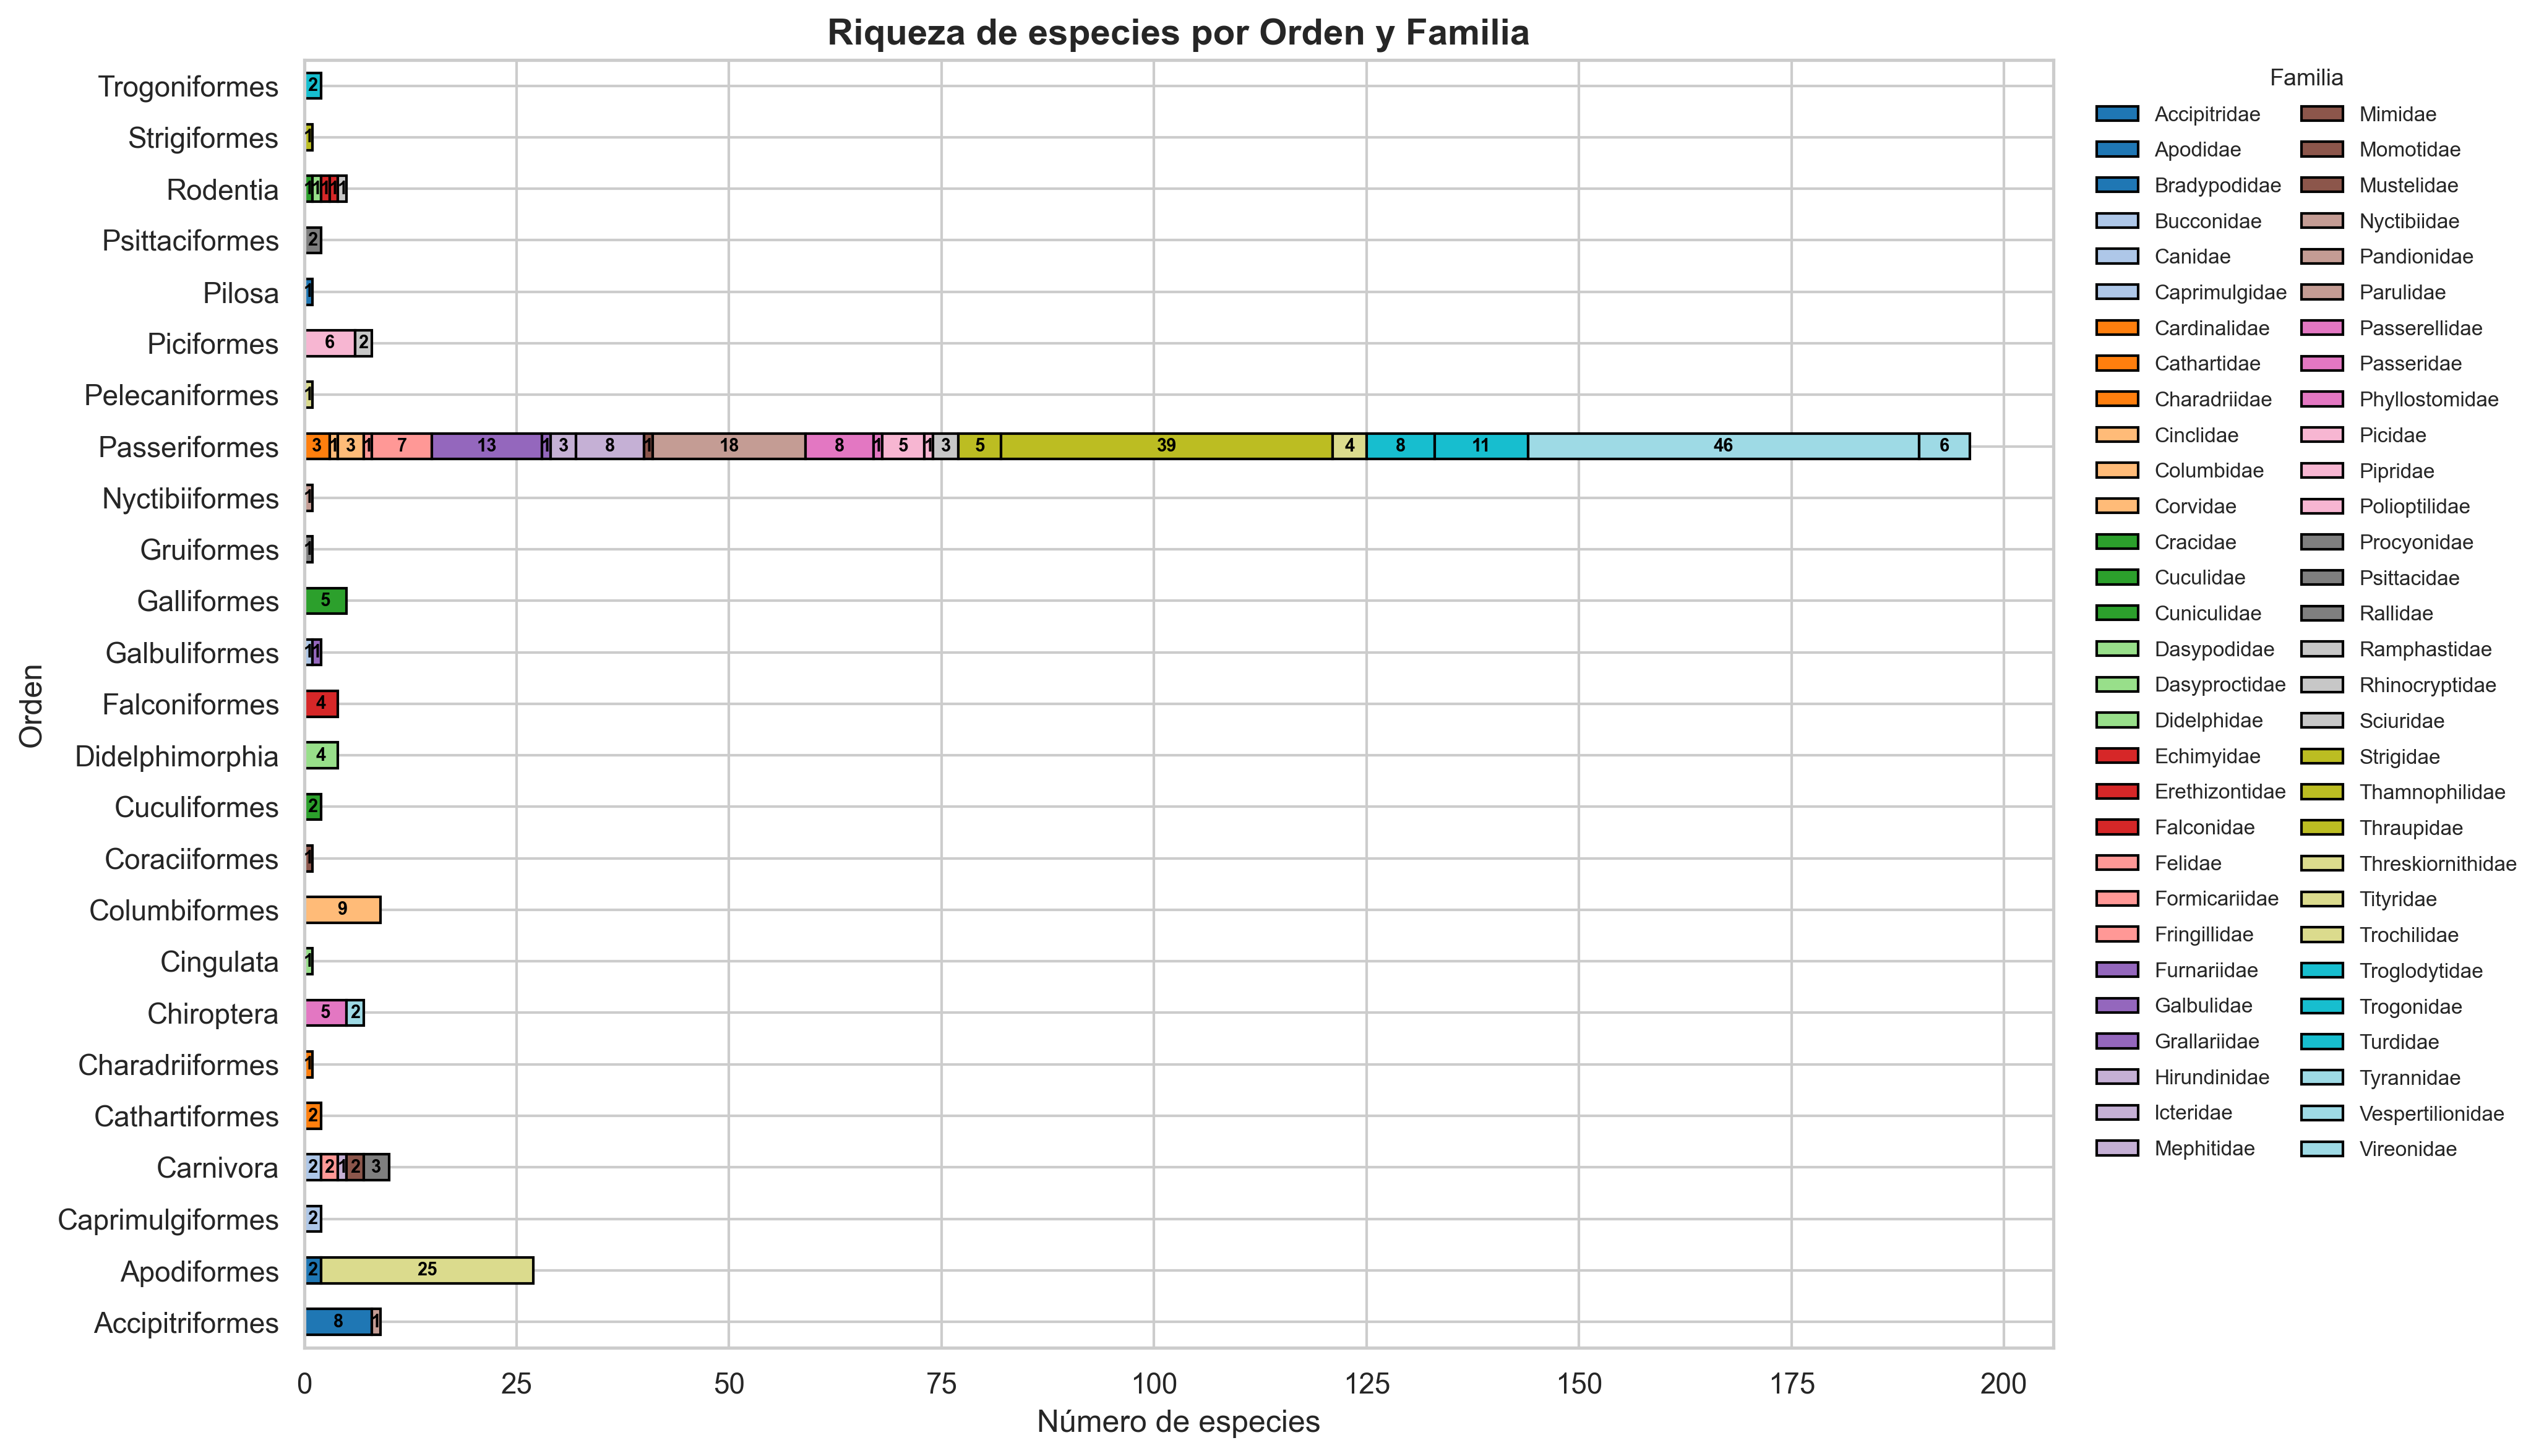

In [ ]:
from IPython.display import Image, display, HTML

display(HTML("<h4>Gráfico generado: Riqueza por orden y familia</h4>"))
display(Image(filename=r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Grafico_Riqueza_Orden_Familia.png"))


## Curvas de acumulación de especies
En general, para evaluar la representatividad de los muestreos, se empleó la curva de acumulación de especies para cada una de las coberturas muestreadas, que representa el número de especies acumulado en el inventario frente al esfuerzo de muestreo realizado. De esta manera, la curva de acumulación es la representación gráfica de la cantidad de las especies que van apareciendo en el muestreo. Los cálculos se realizaron utilizando R Studio y Python, disponible en línea. Para determinar la eficiencia de estos muestreos, se utilizaron los estimadores como ACE, Chao de primer orden, Jacknife 1 o Bootstrap, los cuales arrojan resultados más precisos al estimar la riqueza de ensamblajes con gran cantidad de especies “raras".

#### Generar tabla unidades de muestreo

In [1]:
import pandas as pd
import openpyxl

# Ruta del archivo
ruta = r"D:\CORPONOR 2025\Backet\python_Proyect\data\POF_ZULIA_2025_BD_AVES_MAMIFEROS.xlsx"

# Leer el archivo Excel
Registros = pd.read_excel(ruta)


# --- Paso 1. Asegurar formato de fecha ---
Registros['FECHA'] = pd.to_datetime(Registros['FECHA'])

# --- Paso 2. Crear rangos semanales ---
Registros['RANGO_FECHA'] = Registros['FECHA'].dt.to_period('W')

# --- Paso 3. Crear tabla de abundancia ---
# Agrupamos por especie y rango, sumando el número de individuos
tabla_abundancia = (
    Registros
    .groupby(['ESPECIE', 'RANGO_FECHA'])['INDIVIDUOS']
    .sum()
    .unstack(fill_value=0)   # Filas = especies, columnas = rangos
)

# --- Paso 4. Exportar a Excel ---
ruta_salida = 'D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Tabla_Abundancia_Semanal.xlsx'
with pd.ExcelWriter(ruta_salida, engine='openpyxl') as writer:
    tabla_abundancia.to_excel(writer, sheet_name='Abundancia_Semanal')

print('✅ Tabla de abundancia creada y guardada en:', ruta_salida)
print('\\nVista previa:')
print(tabla_abundancia.head())

#------------------Fin Tabla de Abundancia Semanal------------------#
#-----------------Dar formato al archivo de Tabla_Abundancia_Semanal.xlsx------------------
#---------------------------------- Reparar y formatear archivo de Tabla_Abundancia_Semanal -----------------------
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Alignment, Font, Border, Side
from openpyxl.utils import get_column_letter
import os

# --- Rutas ---
ruta_original = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Tabla_Abundancia_Semanal.xlsx"
ruta_limpia = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Tabla_Abundancia_Semanal.xlsx"

# --- Verificar existencia ---
if not os.path.exists(ruta_original):
    raise FileNotFoundError(f"⚠️ No se encontró el archivo: {ruta_original}")

# --- Leer archivo dañado con pandas ---
try:
    df = pd.read_excel(ruta_original)
    print("✅ Archivo leído correctamente con pandas.")
except Exception as e:
    raise RuntimeError(f"❌ No se pudo leer el archivo: {e}")

# --- Reescribir el archivo limpio ---
df.to_excel(ruta_limpia, index=False)
print(f"🧹 Archivo reparado y guardado como:\n{ruta_limpia}")

# --- Aplicar formato con openpyxl ---
from openpyxl import load_workbook

wb = load_workbook(ruta_limpia)
ws = wb.active

# --- Estilos base ---
header_fill = PatternFill(start_color='BFD8B8', end_color='BFD8B8', fill_type='solid')
header_font = Font(bold=True, color='000000', name='Calibri')
center_align = Alignment(horizontal='center', vertical='center', wrap_text=True)
thin_border = Border(
    left=Side(style='thin', color='000000'),
    right=Side(style='thin', color='000000'),
    top=Side(style='thin', color='000000'),
    bottom=Side(style='thin', color='000000')
)

# --- Aplicar formato y reemplazar vacíos ---
for row in ws.iter_rows():
    for cell in row:
        if cell.value is None or str(cell.value).strip() == '':
            cell.value = '-'
        cell.alignment = center_align
        cell.border = thin_border

# --- Encabezado ---
for cell in ws[1]:
    cell.fill = header_fill
    cell.font = header_font
    cell.alignment = center_align

# --- Ajustar ancho de columnas ---
for col in ws.columns:
    max_length = 0
    column = get_column_letter(col[0].column)
    for cell in col:
        if cell.value:
            length = len(str(cell.value))
            if length > max_length:
                max_length = length
    ws.column_dimensions[column].width = max_length + 3

# --- Ajustar altura de filas ---
for row in ws.iter_rows():
    ws.row_dimensions[row[0].row].height = 18

# --- Guardar cambios ---
wb.save(ruta_limpia)
print(f'📘 Archivo formateado y reparado correctamente:\n{ruta_limpia}')
#------------------Fin Formaterar tabla de Tabla_Abundancia_Semanal------------------#

✅ Tabla de abundancia creada y guardada en: D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Tabla_Abundancia_Semanal.xlsx
\nVista previa:
RANGO_FECHA            2025-08-18/2025-08-24  2025-08-25/2025-08-31  \
ESPECIE                                                               
Aburria aburri                           0.0                    0.0   
Accipiter cooperii                       0.0                    0.0   
Accipiter striatus                       2.0                    0.0   
Adelomyia melanogenys                    0.0                    0.0   
Amazilia tzacatl                         6.0                    0.0   

RANGO_FECHA            2025-09-01/2025-09-07  2025-09-08/2025-09-14  \
ESPECIE                                                               
Aburria aburri                           0.0                    3.0   
Accipiter cooperii                       0.0                    1.0   
Accipiter striatus                       0.0                    0.0   
Adelomy

### Ver Tabla

In [2]:
import pandas as pd
from IPython.display import display, HTML

# --- Leer el archivo Excel ---
# 👇 Usa una cadena RAW (r"...") para evitar errores con las barras invertidas
tabla = pd.read_excel(r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Tabla_Abundancia_Semanal.xlsx")

# --- Mostrar tabla con desplazamiento vertical ---
display(HTML(f"""
<h3>Vista del archivo <code>Tabla_Abundancia_Semanal.xlsx</code></h3>
<div style="
    height: 400px;
    overflow-y: scroll;
    border: 1px solid #ccc;
    padding: 8px;
    font-size: 14px;
">
{tabla.to_html(index=False)}
</div>
"""))

ESPECIE,2025-08-18/2025-08-24,2025-08-25/2025-08-31,2025-09-01/2025-09-07,2025-09-08/2025-09-14,2025-09-15/2025-09-21,2025-09-22/2025-09-28,2025-09-29/2025-10-05,2025-10-06/2025-10-12,2025-10-27/2025-11-02
Aburria aburri,0,0,0,3,3,0,0,0,0
Accipiter cooperii,0,0,0,1,2,0,0,0,0
Accipiter striatus,2,0,0,0,0,0,1,0,0
Adelomyia melanogenys,0,0,0,0,3,0,0,0,0
Amazilia tzacatl,6,0,4,15,5,0,0,1,0
Anabacerthia striaticollis,0,4,0,0,0,0,0,1,0
Anisognathus igniventris,0,0,0,0,5,0,0,0,0
Anoura geoffroyi,0,0,0,0,0,0,0,1,0
Anthracothorax nigricollis,0,0,0,0,0,0,1,0,0
Ara severus,0,0,0,0,0,0,0,1,0


## Generar analisis de datos con iNEXT en R
Lo que se hace es generar un analisis de datos en R con iNEXT donde se generara una curva de acumulacion de especies comparada con el indice Chao1 y tambien un analisis de los numeros de Hills

### Analizar el coeficiente de vairacion CV de la tabla de datos


In [3]:
!pip install rpy2




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%load_ext rpy2.ipython

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


In [5]:
%%R
# ==========================================================
# ANÁLISIS DE ESTIMADORES DE DIVERSIDAD (PARAMÉTRICOS Y NO PARAMÉTRICOS)
# ============================================================
# 🔹 ESTIMADORES DE RIQUEZA TIPO ESTIMATES + IC95%
# ============================================================

# ============================================================
# 🔧 1️⃣ Cargar o instalar paquetes necesarios
# ============================================================
paquetes <- c("readxl", "vegan", "dplyr")

# Instala los que falten
instalar <- paquetes[!(paquetes %in% installed.packages()[,"Package"])]
if(length(instalar)) install.packages(instalar)

# Cargar paquetes
lapply(paquetes, library, character.only = TRUE)

# ============================================================
# 📂 2️⃣ Cargar datos desde Excel
# ============================================================
ruta <- "D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Tabla_Abundancia_Semanal.xlsx"
datos <- read_excel(ruta, sheet = 1)


# ============================================================
# 📊 Evaluar el coeficiente de variación (CV) antes de estimar riqueza
# ============================================================

# 🔹 Paquete necesario
library(SpadeR)
library(tidyverse)

# 🔹 Convertir tu dataframe 'datos' en una matriz de abundancia
# Primera columna = ESPECIE
matriz <- datos %>%
  column_to_rownames("ESPECIE") %>%
  as.matrix()

# ============================================================
# 🔹 Preparar datos de incidencia
# ============================================================
# Convierte la matriz de abundancias a matriz de incidencias (1 = presente, 0 = ausente)
incidencia <- ifelse(matriz > 0, 1, 0)

# ============================================================
# 📊 Evaluar el coeficiente de variación (CV) antes de estimar riqueza
# ============================================================

library(SpadeR)

# 1️⃣ Asegúrate de tener creada la matriz de incidencias
# (si ya la tienes no repitas esta parte)
# incidencia <- ifelse(matriz > 0, 1, 0)

T <- ncol(incidencia)
S_obs <- nrow(incidencia)
f_i <- rowSums(incidencia)

# 2️⃣ Crear el vector en formato correcto para SpadeR
incidencia_freq <- c(T, f_i)

# 3️⃣ Calcular el estimador
spade_temp <- SpadeR::ChaoSpecies(incidencia_freq, datatype = "incidence_freq")

# 4️⃣ Extraer el CV con el nombre correcto
cv_valor <- as.numeric(spade_temp$Basic_data_information$Value[
  spade_temp$Basic_data_information$Variable == "CV"
])

# 5️⃣ Si SpadeR no devuelve CV (raro, pero posible), calcularlo manualmente
if (is.na(cv_valor) || length(cv_valor) == 0) {
  cv_valor <- sd(f_i) / mean(f_i)
  message("⚠️ CV calculado manualmente a partir de las frecuencias de incidencia.")
}

# ============================================================
# 🧭 Interpretación automática del CV (mensaje estilo EstimateS)
# ============================================================

if (cv_valor <= 0.5) {
  mensaje <- paste0(
    "📘 NOTA: El coeficiente de variación estimado para la distribución de incidencias es ",
    round(cv_valor, 3),
    ".\nComo CV ≤ 0.5, la comunidad es relativamente homogénea.\n",
    "➡️ Se recomienda utilizar la versión **corregida por sesgo (bias-corrected)** del estimador Chao2."
  )
} else {
  mensaje <- paste0(
    "⚠️ NOTA: El coeficiente de variación estimado para la distribución de incidencias es ",
    round(cv_valor, 3),
    ".\nDado que CV > 0.5, existe alta heterogeneidad en la detectabilidad de las especies.\n",
    "➡️ Anne Chao recomienda **usar la versión clásica (Classic)** del estimador Chao2 en lugar de la bias-corrected.\n",
    "Posteriormente, compara los valores de **Chao2 clásico** y **ICE**, y reporta el mayor como mejor estimador de la riqueza basada en incidencias."
  )
}

# ============================================================
# 📋 Mostrar el mensaje y el valor numérico
# ============================================================
cat(mensaje, "\n\nValor numérico del CV:", round(cv_valor, 4), "\n")


# ============================================================  Falta exportar avisos del CV a un archivo de texto  
# 📂 3️⃣ Exportar el mensaje a un archivo de text
# ============================================================
ruta_salida <- "D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Analisis_CV.txt"
writeLines(mensaje, con = ruta_salida)      
# ============================================================

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.5
v ggplot2   3.5.2     v stringr   1.5.1
v lubridate 1.9.4     v tibble    3.2.1
v purrr     1.0.4     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xf3 in position 48: invalid continuation byte <traceback object at 0x0000020A283A4AC0>


R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xe9 in position 11: invalid continuation byte <traceback object at 0x0000020A283A4FC0>


 0.836 


Cargando paquete requerido: permute
This is vegan 2.7-1

Adjuntando el paquete: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [7]:
ruta_salida = "D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Analisis_CV.txt"

# Intentar con latin-1
with open(ruta_salida, "r", encoding="latin-1", errors="replace") as f:
    contenido = f.read()

print(contenido)



<U+26A0><U+FE0F> NOTA: El coeficiente de variación estimado para la distribución de incidencias es 0.836.
Dado que CV > 0.5, existe alta heterogeneidad en la detectabilidad de las especies.
<U+27A1><U+FE0F> Anne Chao recomienda **usar la versión clásica (Classic)** del estimador Chao2 en lugar de la bias-corrected.
Posteriormente, compara los valores de **Chao2 clásico** y **ICE**, y reporta el mayor como mejor estimador de la riqueza basada en incidencias.



### Generar el analisis automatico de la curva de acumulacion de especies iNEXT


In [8]:
%%R 
# ==========================================================
# ANÁLISIS DE ESTIMADORES DE DIVERSIDAD (PARAMÉTRICOS Y NO PARAMÉTRICOS)
# ============================================================
# 🔹 ESTIMADORES DE RIQUEZA TIPO ESTIMATES + IC95%
# ============================================================

# ============================================================
# 🔧 1️⃣ Cargar o instalar paquetes necesarios
# ============================================================
paquetes <- c("readxl", "vegan", "dplyr")

# Instala los que falten
instalar <- paquetes[!(paquetes %in% installed.packages()[,"Package"])]
if(length(instalar)) install.packages(instalar)

# Cargar paquetes
lapply(paquetes, library, character.only = TRUE)
#--------------------------------------------------------------Calcular la efectividad del muestreo iNEXT---------------------



library(readxl)
library(iNEXT)
library(dplyr)
# --- Leer la tabla ---
ruta <- "D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Tabla_Abundancia_Semanal.xlsx"
datos <- read_excel(ruta, sheet = 1)

# --- Preparar la matriz de abundancia ---
rownames(datos) <- datos[[1]]       # nombres de especies
datos <- datos[ , -1]               # eliminar columna de nombres
matriz <- as.matrix(datos)

# Vector de abundancias totales por especie
abund_total <- rowSums(matriz)

# Crear el objeto iNEXT
inext_result <- iNEXT(abund_total, q = 0, datatype = "abundance")

# Información básica de los datos (análoga a “Data Summary” de EstimateS)
info <- iNEXT:::DataInfo(abund_total, datatype = "abundance")
info

# Tabla de estimadores asintóticos
asy <- inext_result$AsyEst
asy


interpretar_inext <- function(iNEXT_result, sitio = "Muestreo") {
  info <- info
  asy <- inext_result$AsyEst
  
  n <- info$n
  s_obs <- info$S.obs
  sc <- info$SC
  f1 <- info$f1
  f2 <- info$f2
  
# Convertir las filas a una columna de nombres
asy_df <- tibble::rownames_to_column(as.data.frame(asy), var = "Indice")

# Acceso seguro por nombre del índice
s_obs <- asy_df$Observed[asy_df$Indice == "Species Richness"]
s_est <- asy_df$Estimator[asy_df$Indice == "Species Richness"]

shannon_obs <- asy_df$Observed[asy_df$Indice == "Shannon diversity"]
shannon_est <- asy_df$Estimator[asy_df$Indice == "Shannon diversity"]

simpson_obs <- asy_df$Observed[asy_df$Indice == "Simpson diversity"]
simpson_est <- asy_df$Estimator[asy_df$Indice == "Simpson diversity"]

# Diferencia de riqueza
s_diff <- s_est - s_obs

  
  # --- Interpretaciones dinámicas ---
  cobertura_txt <- case_when(
    sc >= 0.95 ~ "altamente representativo del ensamble analizado",
    sc >= 0.85 ~ "moderadamente representativo del ensamble",
    TRUE ~ "poco representativo; el muestreo podría no haber capturado toda la diversidad existente"
  )
  
  rareza_txt <- case_when(
    f1 / s_obs > 0.3 ~ "una alta proporción de especies raras, lo que sugiere que aún hay especies poco detectadas",
    f1 / s_obs > 0.15 ~ "una proporción moderada de especies raras",
    TRUE ~ "una baja proporción de especies raras, lo que indica una buena caracterización del ensamble"
  )
  
  completitud_txt <- case_when(
    s_diff <= 5 ~ "lo que confirma la alta completitud del inventario",
    s_diff <= 20 ~ "lo que sugiere que podrían existir algunas especies adicionales por detectar",
    TRUE ~ "lo que indica que el esfuerzo de muestreo debería incrementarse para capturar adecuadamente la riqueza total"
  )
  
  texto <- paste0(
    "En el ", sitio, " se registraron un total de ", n, " individuos y ",
    s_obs, " especies observadas. El valor de cobertura de muestra (SC = ",
    round(sc, 4), ") indica que el muestreo fue ", cobertura_txt, ". ",
    "Se detectaron ", f1, " especies con un solo individuo (singletons) y ",
    f2, " con dos individuos (doubletons), lo que representa ", rareza_txt, ". ",
    "El estimador asintótico de riqueza (Chao1) predice aproximadamente ",
    round(s_est, 2), " especies, es decir, unas ",
    round(s_diff, 2), " más de las observadas, ", completitud_txt, ". ",
    "El índice de Shannon aumentó de ", round(shannon_obs, 2), " a ",
    round(shannon_est, 2), ", y el índice de Simpson pasó de ",
    round(simpson_obs, 2), " a ", round(simpson_est, 2), 
    ", lo que refleja la estructura de abundancias y equidad de la comunidad."
  )
  
  return(texto)
}

# Ejemplo
interpretacion <- interpretar_inext(inext_result, sitio = "Muestreo")
cat(interpretacion)



R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xf3 in position 342: invalid continuation byte <traceback object at 0x0000020A283A7580>


In addition: Warning message:
Setting row names on a tibble is deprecated. 


### Graficar Curva de acumulacion 


In [9]:

%%R 
#-------------------------------------------------------------- Gráfica de curvas de acumulación iNEXT---------------------

# Información básica de los datos (análoga a “Data Summary” de EstimateS)
info <- iNEXT:::DataInfo(abund_total, datatype = "abundance")
info

# Tabla de estimadores asintóticos
asy <- inext_result$AsyEst
asy


library(ggplot2)

ggiNEXT(inext_result, type = 1, se = TRUE) +
  labs(
    title = "Curva de acumulación de especies",
    subtitle = "Riqueza observada, interpolada y extrapolada",
    x = "Número de individuos muestreados",
    y = "Número de especies (S)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    legend.position = "bottom"
  )



ggsave(
  "D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Curva_Acumulacion_iNEXT.png",
  width = 10,
  height = 6,
  dpi = 300,
  bg = "white"   # 👈 asegura fondo blanco
)



In addition: Warning message:
In ggiNEXT.iNEXT(inext_result, type = 1, se = TRUE) :
  invalid color.var setting, the iNEXT object do not consist multiple assemblages, change setting as Order.q


### Generar grafico y el informe automatico de los numeros de Hills


                                         Tipo  Observed Estimator Est_s.e.
Species Richness                Riqueza (q=0) 304.00000 316.49585 9.185012
Shannon diversity Diversidad de Shannon (q=1) 154.90376 163.83475 3.287168
Simpson diversity Diversidad de Simpson (q=2)  96.41834  99.57059 3.032021
                  95% Lower 95% Upper
Species Richness  298.49356  334.4981
Shannon diversity 157.39202  170.2775
Simpson diversity  93.62793  105.5132
                                         Tipo  Observed Estimator Est_s.e.
Species Richness                Riqueza (q=0) 304.00000 316.49585 9.185012
Shannon diversity Diversidad de Shannon (q=1) 154.90376 163.83475 3.287168
Simpson diversity Diversidad de Simpson (q=2)  96.41834  99.57059 3.032021
                  95% Lower 95% Upper Diferencia Porcentaje_completitud
Species Richness  298.49356  334.4981  12.495854               96.05181
Shannon diversity 157.39202  170.2775   8.930994               94.54878
Simpson diversity  93.62793  105

R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xf3 in position 77: invalid continuation byte <traceback object at 0x0000020A283C1380>



Shannon diversity

R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xed in position 38: invalid continuation byte <traceback object at 0x0000020A283C17C0>



Simpson diversity

R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xf3 in position 77: invalid continuation byte <traceback object at 0x0000020A283C1BC0>


R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xe1 in position 21: invalid continuation byte <traceback object at 0x0000020A283C1D40>


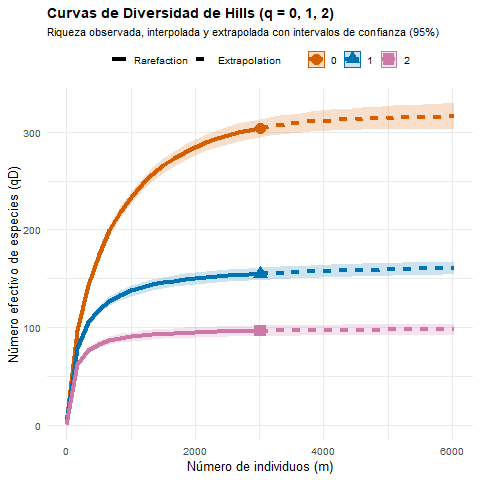

In [10]:


%%R 
#------------------------------------Graficar he interpetar demas estimadores de iNEXT---------------------

inext_todos <- iNEXT(abund_total, q = c(0, 1, 2), datatype = "abundance")

# ======================================
# 📦 Paquetes necesarios
# ======================================
library(iNEXT)
library(dplyr)
library(ggplot2)
library(glue)

# ======================================
# 🧮 1. Cargar tu objeto iNEXT
# ======================================
# (Ya generado previamente)
# inext_todos <- iNEXT(datos, q = c(0,1,2), datatype = "abundance")

# ======================================
# 📊 2. Extraer la tabla asintótica
# ======================================
resumen_asy <- inext_todos$AsyEst %>%
  mutate(
    Orden_q = c(0, 1, 2),
    Tipo = c("Riqueza (q=0)", "Diversidad de Shannon (q=1)", "Diversidad de Simpson (q=2)")
  ) %>%
  select(Tipo, Observed, Estimator, Est_s.e., `95% Lower`, `95% Upper`)

print(resumen_asy)

# ======================================
# 📈 3. Generar gráfico resumen de curvas
# ======================================
grafico_inext <- ggiNEXT(inext_todos, type = 1, se = TRUE, color.var = "Order.q") +
  labs(
    title = "Curvas de Diversidad de Hills (q = 0, 1, 2)",
    subtitle = "Riqueza observada, interpolada y extrapolada con intervalos de confianza (95%)",
    x = "Número de individuos (m)",
    y = "Número efectivo de especies (qD)",
    color = "Orden de diversidad (q)"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    plot.subtitle = element_text(size = 11),
    legend.position = "top"
  )

print(grafico_inext)

# ======================================
# 🧩 4. Cálculo automático de suficiencia e interpretación
# ======================================
interpretacion2 <- resumen_asy %>%
  mutate(
    Diferencia = Estimator - Observed,
    Porcentaje_completitud = (Observed / Estimator) * 100,
    Conclusion = case_when(
      Porcentaje_completitud > 95 ~ "El muestreo fue suficiente; las curvas alcanzan una tendencia asintótica.",
      Porcentaje_completitud > 85 ~ "El muestreo fue adecuado, aunque podrían registrarse algunas especies adicionales.",
      TRUE ~ "El muestreo fue insuficiente; se espera mayor riqueza con un esfuerzo adicional."
    )
  )

print(interpretacion2)

# ======================================
# 📝 5. Generar texto interpretativo automático
# ======================================
texto_interpretacion <- glue(
  "🔹 En el análisis de diversidad basado en números de Hills:
  
  - Para q = 0 (riqueza de especies), se observaron {round(interpretacion2$Observed[1],1)} especies,
    con una estimación asintótica de {round(interpretacion2$Estimator[1],1)} ± {round(interpretacion2$Est_s.e.[1],2)}.
    Esto representa un {round(interpretacion2$Porcentaje_completitud[1],2)}% de completitud, lo que indica que {interpretacion2$Conclusion[1]}.

  - Para q = 1 (diversidad de Shannon), el número efectivo de especies fue de {round(interpretacion2$Observed[2],1)} 
    y la estimación asintótica alcanzó {round(interpretacion2$Estimator[2],1)} ± {round(interpretacion2$Est_s.e.[2],2)} 
    ({round(interpretacion2$Porcentaje_completitud[2],2)}% de completitud). {interpretacion2$Conclusion[2]}.

  - Para q = 2 (diversidad de Simpson), el número efectivo de especies dominantes fue de {round(interpretacion2$Observed[3],1)},
    con un valor esperado de {round(interpretacion2$Estimator[3],1)} ± {round(interpretacion2$Est_s.e.[3],2)}, 
    alcanzando un {round(interpretacion2$Porcentaje_completitud[3],2)}% de completitud. {interpretacion2$Conclusion[3]}.
  
  En conjunto, las tres curvas muestran una tendencia asintótica, evidenciando que el esfuerzo de muestreo fue adecuado 
  para representar la mayoría de las especies presentes en la comunidad."
)

cat(texto_interpretacion)


# ======================================
# 💾 6. Guardar resultados
# ======================================

ggsave("D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Grafico_Hills_iNEXT.png",
       plot = grafico_inext, width = 8, height = 6, dpi = 300,
  bg = "white"   # 👈 asegura fondo blanco
)



### Guardar informe de los analisis realizados con iNEXT


In [13]:

%%R 
#-----------------Guardar documento word con resultados de iNEXT-----------------------

library(officer)
library(magrittr)

# --- Capturar la salida exacta del segundo texto ---
texto_final <- capture.output(cat(texto_interpretacion))

# --- Crear documento Word con ambos gráficos e interpretaciones ---
doc <- read_docx() %>%
  # --- Sección 1: Curva de acumulación ---
  body_add_par("Curva de acumulación de especies (iNEXT)", style = "heading 1") %>%
  body_add_img(
    src = "D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Curva_Acumulacion_iNEXT.png",
    width = 6.5, height = 4.5, style = "centered"
  ) %>%
  body_add_par("Interpretación del análisis", style = "heading 2") %>%
  body_add_fpar(fpar(interpretacion, fp_p = fp_par(text.align = "justify"))) %>%  # ← tu texto justificado original
  
  # --- Sección 2: Números de Hill ---
  body_add_par("Curvas de números de Hills (iNEXT)", style = "heading 1") %>%
  body_add_img(
    src = "D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Grafico_Hills_iNEXT.png",
    width = 6.5, height = 4.5, style = "centered"
  ) %>%
  body_add_par("Interpretación de los números de Hills", style = "heading 2") %>%
  body_add_fpar(fpar(
    paste(texto_final, collapse = "\n"),
    fp_p = fp_par(text.align = "justify")
  ))  # ← también justificado

# --- Guardar el documento ---
print(doc, target = "D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Informe_Completo_iNEXT.docx")



### Convertir documento a pdf

In [14]:

from docx2pdf import convert

convert(r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Informe_Completo_iNEXT.docx")
print("✅ Archivo convertido a PDF exitosamente.")



  0%|          | 0/1 [00:00<?, ?it/s]

✅ Archivo convertido a PDF exitosamente.


### Mostrar PDF

In [15]:
from IPython.display import IFrame

# Ruta del PDF
ruta_pdf = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Informe_Completo_iNEXT.pdf"

# Mostrar el PDF dentro del notebook
IFrame(src=ruta_pdf, width=900, height=600)


## Crear Tabla de estimamdores basados en abundancias 
Se utiliza el paquete SpadeR de R para crear un atabala con todos los estimadores posibles y sus intervalos, creando así un modelo similar a EstimateS pero con mayor robustes

In [13]:
%load_ext rpy2.ipython


Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


In [15]:
%%R 
#------------------------------------Análisis de estimadores clásicos de abundancia y bootstrap manual---------------------

#--------------------------------Cargar paquetes y documentos---------------------------------------
paquetes <- c("readxl", "vegan", "dplyr")

# Instala los que falten
instalar <- paquetes[!(paquetes %in% installed.packages()[,"Package"])]
if(length(instalar)) install.packages(instalar)

# Cargar paquetes
lapply(paquetes, library, character.only = TRUE)

ruta <- "D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Tabla_Abundancia_Semanal.xlsx"
datos <- read_excel(ruta, sheet = 1)

# 🔹 Paquete necesario
library(SpadeR)
library(tidyverse)

#------------------------------------Crear matriz de abundancia y calcular estimadores clásicos de abundancia---------------------
# 🔹 Convertir tu dataframe 'datos' en una matriz de abundancia
# Primera columna = ESPECIE
matriz <- datos %>%
  column_to_rownames("ESPECIE") %>%
  as.matrix()

str(matriz)
colnames(matriz) <- paste0("Unidad", 1:ncol(matriz))
colnames(matriz)

str(matriz)

library(SpadeR)

# Vector de abundancias totales
abund_total <- rowSums(matriz)

str(abund_total)

# Calcular estimadores clásicos de riqueza (tipo abundance)
spade_result <- ChaoSpecies(abund_total, datatype = "abundance")

# Mostrar el resumen
spade_result

#------------------------------------Calcular estimamdores acomulados por semana---------------

library(dplyr)
library(tidyr)
library(openxlsx)
library(SpadeR)

resultados_list <- list()

for (i in 1:ncol(matriz)) {
  cat("\n--- Unidad acumulada:", i, "---\n")
  
  abund_acumulada <- rowSums(matriz[, 1:i, drop = FALSE])
  resultado <- ChaoSpecies(abund_acumulada, datatype = "abundance")
 
tabla <- as.data.frame(resultado$Species_table)
tabla$Estimador <- rownames(resultado$Species_table)
tabla$Unidad <- paste0("Unidad", i)

  
  resultados_list[[i]] <- tabla
}

# --- Unir todas las semanas ---
resultados_totales <- bind_rows(resultados_list)

# --- Limpiar nombres ---
resultados_totales <- resultados_totales %>%
  rename(
    Mean = Estimate,
    SD = s.e.,
    Low = `95%Lower`,
    Upp = `95%Upper`
  ) %>%
  select(Unidad, Estimador, Mean, SD, Low, Upp)

print(resultados_totales)

library(dplyr)
library(tidyr)
library(stringr)

# --- 1. Limpiar nombres de los estimadores ---
resultados_limpios <- resultados_totales %>%
  mutate(
    Unidad = trimws(Unidad),
    Estimador = trimws(Estimador),
    # Reemplazar espacios, paréntesis, comas, etc. por "_"
    Estimador = str_replace_all(Estimador, "[^A-Za-z0-9]+", "_"),
    Estimador = str_replace_all(Estimador, "_+", "_"),
    Estimador = str_remove_all(Estimador, "^_|_$")
  )

# --- 2. Pivotar para agrupar Low, Mean y Upp por estimador ---
resultados_wide <- resultados_limpios %>%
  pivot_wider(
    names_from = Estimador,
    values_from = c(Low, Mean, SD, Upp),
    names_glue = "{Estimador}_{.value}"
  )

# --- 3. Reordenar columnas para que queden Low, Mean, Upp juntos ---
orden_columnas <- resultados_wide %>%
  select(Unidad, sort(tidyselect::peek_vars())) %>%
  names()

# Reordenamos columnas para que cada estimador tenga Low, Mean, Upp juntos
orden_ordenado <- c("Unidad")
for (est in unique(resultados_limpios$Estimador)) {
  orden_ordenado <- c(
    orden_ordenado,
    paste0(est, c("_Low", "_Mean", "_SD", "_Upp"))
  )
}
# Filtrar solo las columnas que existen
orden_ordenado <- intersect(orden_ordenado, names(resultados_wide))
resultados_wide <- resultados_wide[, orden_ordenado]

# --- Calcular Observadas, Singletons y Doubletons por semana ---


library(boot)
library(dplyr)

# --- Crear lista vacía ---
resumen_list <- list()

# --- Definir una función auxiliar para bootstrap ---
calc_stats <- function(abund, R = 1000) {
  # Bootstrap simple
  boot_res <- boot(data = abund, statistic = function(x, i) {
    xi <- x[i]
    c(
      Observadas = sum(xi > 0),
      Singletons = sum(xi == 1),
      Doubletons = sum(xi == 2)
    )
  }, R = R)
  
  # Calcular media, sd y quantiles
  resumen <- apply(boot_res$t, 2, function(x) {
    c(
      Mean = mean(x, na.rm = TRUE),
      SD = sd(x, na.rm = TRUE),
      Low = quantile(x, 0.025, na.rm = TRUE),
      Upp = quantile(x, 0.975, na.rm = TRUE)
    )
  })
  
  # Convertir a data.frame con nombres
  resumen_df <- as.data.frame(t(resumen))
  resumen_df$Metrica <- rownames(resumen_df)
  return(resumen_df)
}

# --- Bucle para acumular semanas ---
for (i in 1:ncol(matriz)) {
  abund_acumulada <- rowSums(matriz[, 1:i, drop = FALSE])
  
  # Calcular estadísticas bootstrap
  boot_df <- calc_stats(abund_acumulada, R = 1000)
  boot_df$Unidad <- paste0("Unidad", i)
  
  resumen_list[[i]] <- boot_df
}


# --- Unir todos los resultados del resumen ---
resumen_total <- bind_rows(resumen_list) %>%
  # Renombrar correctamente las columnas antes de seleccionar
  rename(
    Low = `Low.2.5%`,
    Upp = `Upp.97.5%`
  ) %>%
  select(Unidad, Metrica, Mean, SD, Low, Upp)

# --- Revisar resultado final ---
print(resumen_total)

library(dplyr)
library(tidyr)

# --- Paso 1: reemplazar Metrica numérica por nombres claros ---
resumen_total <- resumen_total %>%
  mutate(
    Metrica = case_when(
      Metrica == 1 ~ "Observadas",
      Metrica == 2 ~ "Singletons",
      Metrica == 3 ~ "Doubletons"
    )
  )

# --- Paso 2: pivotar para dejar una fila por unidad ---
resumen_pivot <- resumen_total %>%
  pivot_wider(
    names_from = Metrica,
    values_from = c(Mean, SD, Low, Upp),
    names_glue = "{Metrica}_{.value}"
  )

# --- Ver resultado final ---
print(resumen_pivot)

# --- Reordenar columnas por bloque lógico ---
resumen_pivot <- resumen_pivot %>%
  select(
    Unidad,
    Observadas_Low, Observadas_Mean, Observadas_SD, Observadas_Upp,
    Singletons_Low, Singletons_Mean, Singletons_SD, Singletons_Upp,
    Doubletons_Low, Doubletons_Mean, Doubletons_SD, Doubletons_Upp
  )

# --- Verificar ---
print(resumen_pivot)

# --- Integrar resumen con resultados_wide ---

resultados_Final <- left_join(resumen_pivot, resultados_wide, by = "Unidad")





#----------------------------------Agregar Bootstraping-----------------------------------------------------

library(boot)
library(dplyr)
library(SpadeR)

# --- Función para calcular el estimador Chao1 (corrige el nombre automáticamente) ---
calc_chao1 <- function(data, indices) {
  muestra <- data[indices]
  resultado <- SpadeR::ChaoSpecies(muestra, datatype = "abundance")
  
  # Buscar el nombre que contenga "Chao1"
  fila_chao <- grep("Chao1", rownames(resultado$Species_table), value = TRUE)
  
  if (length(fila_chao) == 0) return(NA)
  
  valor <- resultado$Species_table[fila_chao[1], "Estimate"]
  return(valor)
}

# --- Lista para guardar resultados ---
bootstrap_list <- list()

# --- Bucle por unidad ---
for (i in 1:ncol(matriz)) {
  cat("\n--- Bootstrap para Unidad", i, "---\n")
  
  abund_acumulada <- rowSums(matriz[, 1:i, drop = FALSE])
  
  # Bootstrap con 1000 repeticiones
  boot_res <- boot(data = abund_acumulada, statistic = calc_chao1, R = 100)
  
  # Media, desviación y percentiles
  media <- mean(boot_res$t, na.rm = TRUE)
  sd <- sd(boot_res$t, na.rm = TRUE)
  low <- quantile(boot_res$t, 0.025, na.rm = TRUE)
  upp <- quantile(boot_res$t, 0.975, na.rm = TRUE)
  
  # Guardar resultados
  bootstrap_list[[i]] <- data.frame(
    Unidad = paste0("Unidad", i),
    Bootstrap_Mean = media,
    Bootstrap_SD = sd,
    Bootstrap_Low = low,
    Bootstrap_Upp = upp
  )
}

# --- Unir todos los resultados ---
bootstrap_total <- bind_rows(bootstrap_list)

print(bootstrap_total)

# --- Integrar con resultados_Final -------------------------------------------------------
resultados_Final1 <- left_join(resultados_Final, bootstrap_total, by = "Unidad")

# --- 4. Verificar estructura final ---
glimpse(resultados_Final1)


library(openxlsx)
write.xlsx(resultados_Final1, "D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Estimadores_Abundancia.xlsx")
cat("\n✅ Archivo exportado correctamente con los estimadores agrupados por semana.\n")



 num [1:304, 1:9] 

0 0 2 0 6 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:304] "Aburria aburri" "Accipiter cooperii" "Accipiter striatus" "Adelomyia melanogenys" ...
  ..$ : chr [1:9] "2025-08-18/2025-08-24" "2025-08-25/2025-08-31" "2025-09-01/2025-09-07" "2025-09-08/2025-09-14" ...
 num [1:304, 1:9] 0 0 2 0 6 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:304] "Aburria aburri" "Accipiter cooperii" "Accipiter striatus" "Adelomyia melanogenys" ...
  ..$ : chr [1:9] "Unidad1" "Unidad2" "Unidad3" "Unidad4" ...
 Named num [1:304] 6 3 3 3 31 5 5 1 1 1 ...
 - attr(*, "names")= chr [1:304] "Aburria aburri" "Accipiter cooperii" "Accipiter striatus" "Adelomyia melanogenys" ...

--- Unidad acumulada: 1 ---

--- Unidad acumulada: 2 ---

--- Unidad acumulada: 3 ---

--- Unidad acumulada: 4 ---

--- Unidad acumulada: 5 ---

--- Unidad acumulada: 6 ---

--- Unidad acumulada: 7 ---

--- Unidad acumulada: 8 ---

--- Unidad acumulada: 9 ---
                                    Unidad       


#### Mostrar tabla de estimadores basados en abundancias

In [16]:
import pandas as pd
from IPython.display import display, HTML

# --- Leer el archivo Excel ---
# 👇 Usa una cadena RAW (r"...") para evitar errores con las barras invertidas
tabla = pd.read_excel(r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Estimadores_Abundancia.xlsx")

# --- Mostrar tabla con desplazamiento vertical ---
display(HTML(f"""
<h3>Vista del archivo <code>Estimadores_Abundancia.xlsx</code></h3>
<div style="
    height: 400px;
    overflow-y: scroll;
    border: 1px solid #ccc;
    padding: 8px;
    font-size: 14px;
">
{tabla.to_html(index=False)}
</div>
"""))

Unidad,Observadas_Low,Observadas_Mean,Observadas_SD,Observadas_Upp,Singletons_Low,Singletons_Mean,Singletons_SD,Singletons_Upp,Doubletons_Low,Doubletons_Mean,Doubletons_SD,Doubletons_Upp,Homogeneous_Model_Low,Homogeneous_Model_Mean,Homogeneous_Model_SD,Homogeneous_Model_Upp,Homogeneous_MLE_Low,Homogeneous_MLE_Mean,Homogeneous_MLE_SD,Homogeneous_MLE_Upp,Chao1_Chao_1984_Low,Chao1_Chao_1984_Mean,Chao1_Chao_1984_SD,Chao1_Chao_1984_Upp,Chao1_bc_Low,Chao1_bc_Mean,Chao1_bc_SD,Chao1_bc_Upp,iChao1_Chiu_et_al_2014_Low,iChao1_Chiu_et_al_2014_Mean,iChao1_Chiu_et_al_2014_SD,iChao1_Chiu_et_al_2014_Upp,ACE_Chao_Lee_1992_Low,ACE_Chao_Lee_1992_Mean,ACE_Chao_Lee_1992_SD,ACE_Chao_Lee_1992_Upp,ACE_1_Chao_Lee_1992_Low,ACE_1_Chao_Lee_1992_Mean,ACE_1_Chao_Lee_1992_SD,ACE_1_Chao_Lee_1992_Upp,1st_order_jackknife_Low,1st_order_jackknife_Mean,1st_order_jackknife_SD,1st_order_jackknife_Upp,2nd_order_jackknife_Low,2nd_order_jackknife_Mean,2nd_order_jackknife_SD,2nd_order_jackknife_Upp,Bootstrap_Mean,Bootstrap_SD,Bootstrap_Low,Bootstrap_Upp
Unidad1,80,96.118,7.969039,112.025,11,17.968,3.981058,26.000,14.000,22.027,4.430564,31.000,98.184,101.633,2.890,110.526,96.278,97.284,1.175,101.924,98.346,103.346,4.668,119.004,98.061,102.636,4.340,117.374,101.663,104.823,2.023,109.749,100.072,106.012,4.848,120.615,100.389,107.125,5.590,124.195,105.501,113.957,5.989,129.938,99.852,110.028,10.354,147.089,104.37065,11.005746,84.669200,126.719250
Unidad2,97,113.489,8.959138,132.000,9,16.145,3.894244,24.000,20.000,30.206,5.405440,41.025,114.692,117.636,2.551,125.703,113.198,114.027,1.041,118.334,114.200,117.259,3.066,128.110,114.049,116.864,2.884,127.236,116.123,118.322,1.474,122.069,115.819,120.350,3.820,132.165,115.961,120.845,4.154,133.786,121.148,128.970,5.649,144.302,113.064,115.078,9.767,179.963,118.27810,8.795129,101.613425,135.397350
Unidad3,133,149.417,8.398908,166.000,4,9.073,2.965884,15.000,29.000,40.160,5.773364,52.000,149.643,151.363,1.758,157.675,149.045,149.405,0.643,152.648,149.158,150.011,1.221,155.489,149.126,149.877,1.132,155.108,149.158,150.011,1.221,155.489,150.021,152.423,2.330,160.473,150.043,152.507,2.394,160.789,152.735,157.990,4.239,170.635,153.930,149.000,2.760,165.528,149.81845,8.651755,137.875000,167.563400
Unidad4,184,199.800,8.126749,216.000,10,18.095,4.255359,27.000,31.000,42.890,5.959985,54.000,201.934,205.040,2.618,213.135,200.004,200.088,0.298,201.976,201.069,203.765,2.692,213.264,200.954,203.475,2.566,212.664,201.069,203.765,2.692,213.264,202.926,207.289,3.586,218.155,203.021,207.584,3.767,219.038,209.520,217.988,5.997,233.988,208.432,200.000,3.243,222.117,204.51878,7.795709,188.502575,218.659025
Unidad5,223,236.156,7.214549,250.025,15,24.818,4.621714,34.000,30.975,41.960,6.167693,54.000,238.954,242.829,3.058,251.785,236.001,236.026,0.161,237.115,238.654,243.437,4.196,256.837,238.439,242.974,4.023,255.939,242.012,244.973,1.853,249.392,241.310,247.491,4.707,260.867,241.605,248.268,5.106,262.852,250.507,260.988,7.069,279.043,236.936,244.024,12.238,304.793,242.77555,9.081423,227.923850,260.392500
Unidad6,238,250.997,6.545673,264.000,15,23.149,4.513665,32.000,39.000,51.265,6.374905,64.000,253.735,257.457,2.971,266.242,251.001,251.024,0.155,252.069,252.691,256.184,3.223,266.893,252.548,255.863,3.100,266.276,252.691,256.184,3.223,266.893,255.578,261.187,4.337,273.670,255.775,261.723,4.621,275.081,264.053,273.990,6.780,291.491,262.236,251.000,3.607,277.438,257.02530,7.922566,241.296900,270.445325
Unidad7,262,273.343,5.266791,283.000,18,26.998,4.845769,37.000,41.000,54.352,6.596333,68.000,276.697,281.088,3.364,290.694,273.000,273.017,0.131,273.903,275.420,279.747,3.786,291.814,275.244,279.379,3.656,291.132,277.760,280.263,1.584,284.082,277.926,283.716,4.423,296.315,278.056,284.108,4.648,297.408,288.982,299.990,7.346,318.579,273.000,273.031,12.719,300.680,279.47169,5.892140,266.914800,290.412700
Unidad8,296,299.987,1.981100,303.000,24,33.839,5.553550,45.025,38.000,50.923,6.428717,64.000,304.956,310.069,3.764,320.456,300.000,300.016,0.128,300.880,3

### Analizar tabla de estimadores de abundancia
Se analiza la tabla de estimadores de abundancias para encontrar los estimadores mas efectivos y crear la tabla de estimadoes, de porcentajes de efectividad y tambien graficar la curva de acumulacion de especies con los dos mejores estimadores y con la desviacion estandar de los singlentons

In [ ]:
#-------------------------Dar formato al archivo Estimadores_Abundancia.xlsx-------------------------#
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Alignment, Font, Border, Side
from openpyxl.utils import get_column_letter
import os

# --- Rutas ---
ruta_original = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Estimadores_Abundancia.xlsx"
ruta_limpia = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Estimadores_Abundancia.xlsx"

# --- Verificar existencia ---
if not os.path.exists(ruta_original):
    raise FileNotFoundError(f"⚠️ No se encontró el archivo: {ruta_original}")

# --- Leer archivo dañado con pandas ---
try:
    df = pd.read_excel(ruta_original)
    print("✅ Archivo leído correctamente con pandas.")
except Exception as e:
    raise RuntimeError(f"❌ No se pudo leer el archivo: {e}")

# --- Reescribir el archivo limpio ---
df.to_excel(ruta_limpia, index=False)
print(f"🧹 Archivo reparado y guardado como:\n{ruta_limpia}")

# --- Aplicar formato con openpyxl ---
from openpyxl import load_workbook

wb = load_workbook(ruta_limpia)
ws = wb.active

# --- Estilos base ---
header_fill = PatternFill(start_color='BFD8B8', end_color='BFD8B8', fill_type='solid')
header_font = Font(bold=True, color='000000', name='Calibri')
center_align = Alignment(horizontal='center', vertical='center', wrap_text=True)
thin_border = Border(
    left=Side(style='thin', color='000000'),
    right=Side(style='thin', color='000000'),
    top=Side(style='thin', color='000000'),
    bottom=Side(style='thin', color='000000')
)

# --- Aplicar formato y reemplazar vacíos ---
for row in ws.iter_rows():
    for cell in row:
        if cell.value is None or str(cell.value).strip() == '':
            cell.value = '-'
        cell.alignment = center_align
        cell.border = thin_border

# --- Encabezado ---
for cell in ws[1]:
    cell.fill = header_fill
    cell.font = header_font
    cell.alignment = center_align

# --- Ajustar ancho de columnas ---
for col in ws.columns:
    max_length = 0
    column = get_column_letter(col[0].column)
    for cell in col:
        if cell.value:
            length = len(str(cell.value))
            if length > max_length:
                max_length = length
    ws.column_dimensions[column].width = max_length + 3

# --- Ajustar altura de filas ---
for row in ws.iter_rows():
    ws.row_dimensions[row[0].row].height = 18

# --- Guardar cambios ---
wb.save(ruta_limpia)
print(f'📘 Archivo formateado y reparado correctamente:\n{ruta_limpia}')

#-------------------------Fin Dar formato al archivo Estimadores_Abundancia.xlsx-------------------------#


✅ Archivo leído correctamente con pandas.
🧹 Archivo reparado y guardado como:
D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Estimadores_Abundancia.xlsx
📘 Archivo formateado y reparado correctamente:
D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Estimadores_Abundancia.xlsx


#### Ver tabla formateada

In [22]:
import pandas as pd
from IPython.display import display, HTML

# --- Leer el archivo Excel ---
# 👇 Usa una cadena RAW (r"...") para evitar errores con las barras invertidas
tabla = pd.read_excel(r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Estimadores_Abundancia.xlsx")

# --- Mostrar tabla con desplazamiento vertical ---
display(HTML(f"""
<h3>Vista del archivo <code>Estimadores_Abundancia.xlsx</code></h3>
<div style="
    height: 400px;
    overflow-y: scroll;
    border: 1px solid #ccc;
    padding: 8px;
    font-size: 14px;
">
{tabla.to_html(index=False)}
</div>
"""))

Unidad,Observadas_Low,Observadas_Mean,Observadas_SD,Observadas_Upp,Singletons_Low,Singletons_Mean,Singletons_SD,Singletons_Upp,Doubletons_Low,Doubletons_Mean,Doubletons_SD,Doubletons_Upp,Homogeneous_Model_Low,Homogeneous_Model_Mean,Homogeneous_Model_SD,Homogeneous_Model_Upp,Homogeneous_MLE_Low,Homogeneous_MLE_Mean,Homogeneous_MLE_SD,Homogeneous_MLE_Upp,Chao1_Chao_1984_Low,Chao1_Chao_1984_Mean,Chao1_Chao_1984_SD,Chao1_Chao_1984_Upp,Chao1_bc_Low,Chao1_bc_Mean,Chao1_bc_SD,Chao1_bc_Upp,iChao1_Chiu_et_al_2014_Low,iChao1_Chiu_et_al_2014_Mean,iChao1_Chiu_et_al_2014_SD,iChao1_Chiu_et_al_2014_Upp,ACE_Chao_Lee_1992_Low,ACE_Chao_Lee_1992_Mean,ACE_Chao_Lee_1992_SD,ACE_Chao_Lee_1992_Upp,ACE_1_Chao_Lee_1992_Low,ACE_1_Chao_Lee_1992_Mean,ACE_1_Chao_Lee_1992_SD,ACE_1_Chao_Lee_1992_Upp,1st_order_jackknife_Low,1st_order_jackknife_Mean,1st_order_jackknife_SD,1st_order_jackknife_Upp,2nd_order_jackknife_Low,2nd_order_jackknife_Mean,2nd_order_jackknife_SD,2nd_order_jackknife_Upp,Bootstrap_Mean,Bootstrap_SD,Bootstrap_Low,Bootstrap_Upp
Unidad1,80,96.118,7.969039,112.025,11,17.968,3.981058,26.000,14.000,22.027,4.430564,31.000,98.184,101.633,2.890,110.526,96.278,97.284,1.175,101.924,98.346,103.346,4.668,119.004,98.061,102.636,4.340,117.374,101.663,104.823,2.023,109.749,100.072,106.012,4.848,120.615,100.389,107.125,5.590,124.195,105.501,113.957,5.989,129.938,99.852,110.028,10.354,147.089,104.37065,11.005746,84.669200,126.719250
Unidad2,97,113.489,8.959138,132.000,9,16.145,3.894244,24.000,20.000,30.206,5.405440,41.025,114.692,117.636,2.551,125.703,113.198,114.027,1.041,118.334,114.200,117.259,3.066,128.110,114.049,116.864,2.884,127.236,116.123,118.322,1.474,122.069,115.819,120.350,3.820,132.165,115.961,120.845,4.154,133.786,121.148,128.970,5.649,144.302,113.064,115.078,9.767,179.963,118.27810,8.795129,101.613425,135.397350
Unidad3,133,149.417,8.398908,166.000,4,9.073,2.965884,15.000,29.000,40.160,5.773364,52.000,149.643,151.363,1.758,157.675,149.045,149.405,0.643,152.648,149.158,150.011,1.221,155.489,149.126,149.877,1.132,155.108,149.158,150.011,1.221,155.489,150.021,152.423,2.330,160.473,150.043,152.507,2.394,160.789,152.735,157.990,4.239,170.635,153.930,149.000,2.760,165.528,149.81845,8.651755,137.875000,167.563400
Unidad4,184,199.800,8.126749,216.000,10,18.095,4.255359,27.000,31.000,42.890,5.959985,54.000,201.934,205.040,2.618,213.135,200.004,200.088,0.298,201.976,201.069,203.765,2.692,213.264,200.954,203.475,2.566,212.664,201.069,203.765,2.692,213.264,202.926,207.289,3.586,218.155,203.021,207.584,3.767,219.038,209.520,217.988,5.997,233.988,208.432,200.000,3.243,222.117,204.51878,7.795709,188.502575,218.659025
Unidad5,223,236.156,7.214549,250.025,15,24.818,4.621714,34.000,30.975,41.960,6.167693,54.000,238.954,242.829,3.058,251.785,236.001,236.026,0.161,237.115,238.654,243.437,4.196,256.837,238.439,242.974,4.023,255.939,242.012,244.973,1.853,249.392,241.310,247.491,4.707,260.867,241.605,248.268,5.106,262.852,250.507,260.988,7.069,279.043,236.936,244.024,12.238,304.793,242.77555,9.081423,227.923850,260.392500
Unidad6,238,250.997,6.545673,264.000,15,23.149,4.513665,32.000,39.000,51.265,6.374905,64.000,253.735,257.457,2.971,266.242,251.001,251.024,0.155,252.069,252.691,256.184,3.223,266.893,252.548,255.863,3.100,266.276,252.691,256.184,3.223,266.893,255.578,261.187,4.337,273.670,255.775,261.723,4.621,275.081,264.053,273.990,6.780,291.491,262.236,251.000,3.607,277.438,257.02530,7.922566,241.296900,270.445325
Unidad7,262,273.343,5.266791,283.000,18,26.998,4.845769,37.000,41.000,54.352,6.596333,68.000,276.697,281.088,3.364,290.694,273.000,273.017,0.131,273.903,275.420,279.747,3.786,291.814,275.244,279.379,3.656,291.132,277.760,280.263,1.584,284.082,277.926,283.716,4.423,296.315,278.056,284.108,4.648,297.408,288.982,299.990,7.346,318.579,273.000,273.031,12.719,300.680,279.47169,5.892140,266.914800,290.412700
Unidad8,296,299.987,1.981100,303.000,24,33.839,5.553550,45.025,38.000,50.923,6.428717,64.000,304.956,310.069,3.764,320.456,300.000,300.016,0.128,300.880,3

#### Graficar y crear tabla de efectividad

🏆 Mejores estimadores por grupo:
       Grupo                          Estimador  Efectividad_Promedio_%
0       Chao             Chao1_bc_Efectividad_%               96.234204
1  Bootstrap            Bootstrap_Efectividad_%               95.754401
2  Jackknife  2nd_order_jackknife_Efectividad_%               93.534432

📊 Nombres finales para graficar: ['Chao1_bc_Mean', 'Bootstrap_Mean', '2nd_order_jackknife_Mean']
✅ Tabla de efectividad exportada correctamente.
✅ Archivo leído correctamente con pandas.
🧹 Archivo reparado y guardado como:
D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Efectividad_Estimadores.xlsx
📘 Archivo formateado y reparado correctamente:
D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Efectividad_Estimadores.xlsx
📊 Mejores estimadores: ['Chao1_bc_Mean', 'Bootstrap_Mean', '2nd_order_jackknife_Mean']


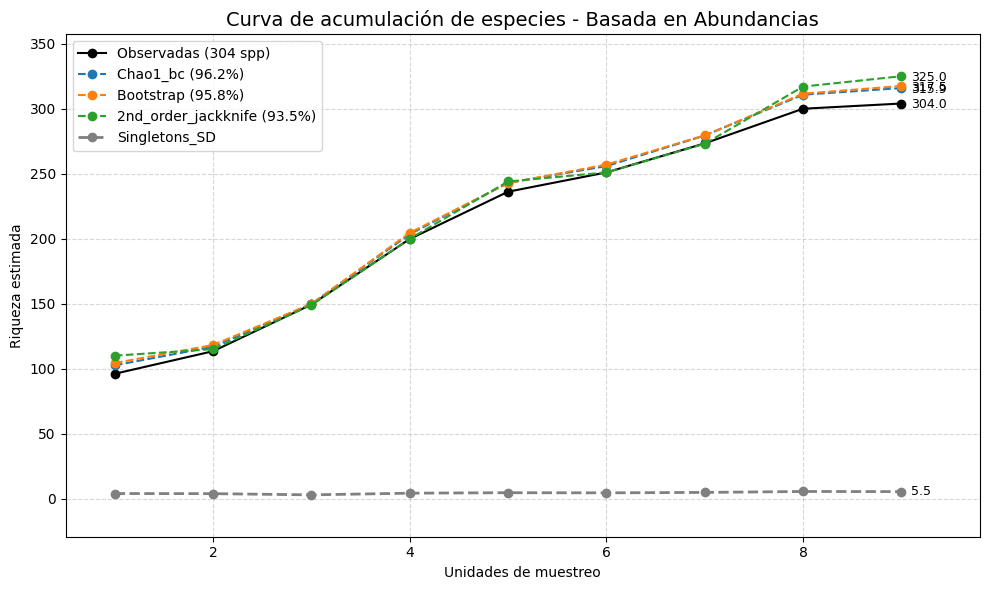

✅ Gráfica guardada correctamente.

📋 Resumen de estimadores (valores finales):
           Estimador  Individuos_estimados  Efectividad_%
          Observadas                304.00            NaN
            Chao1_bc                315.90          96.23
           Bootstrap                317.48          95.75
 2nd_order_jackknife                325.01          93.53
Promedio efectividad                   NaN          95.17

✅ Archivo Excel guardado en:
D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Resumen_estimadores.xlsx
✅ Archivo leído correctamente con pandas.
🧹 Archivo reparado y guardado como:
D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Resumen_estimadores.xlsx
📘 Archivo formateado y reparado correctamente:
D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Resumen_estimadores.xlsx


In [24]:
#-----------------------leer el archivo formateado-----------------------#
import pandas as pd
tabla_Abund = pd.read_excel(r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Estimadores_Abundancia.xlsx")

tabla_Abund

names = tabla_Abund.columns.tolist()
names


#-----------------------Calcular efectividad de los estimadores de abundancia-----------------------#
import pandas as pd

# --- Cargar datos ---
ruta = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Estimadores_Abundancia.xlsx"
tabla_Abund = pd.read_excel(ruta)

# --- Calcular efectividad para cada estimador ---
estimadores = ['Chao1_Chao_1984_Mean', 'Chao1_bc_Mean', 'iChao1_Chiu_et_al_2014_Mean',
               'ACE_Chao_Lee_1992_Mean', 'ACE_1_Chao_Lee_1992_Mean', '1st_order_jackknife_Mean', '2nd_order_jackknife_Mean', 
               'Bootstrap_Mean',]  # ajusta según tus columnas reales

efectividad = pd.DataFrame()
efectividad['Unidad'] = tabla_Abund['Unidad']
efectividad['Observadas_Mean'] = tabla_Abund['Observadas_Mean']

for est in estimadores:
    if est in tabla_Abund.columns:
        efectividad[est.replace('_Mean', '_Efectividad_%')] = (
            (tabla_Abund['Observadas_Mean'] / tabla_Abund[est]) * 100
        )

# --- Calcular  total de efectividad por estimador ---
# (último valor registrado en cada columna para cada estimador)
resumen = (
    efectividad
    .drop(columns=['Unidad', 'Observadas_Mean'])
    .tail(1)  # ✅ toma la última fila (la efectividad final)
    .melt(var_name='Estimador', value_name='Efectividad_Promedio_%')
    .reset_index(drop=True)
)

# --- Seleccionar los dos mejores estimadores según efectividad ---
resumen = resumen.sort_values(by='Efectividad_Promedio_%', ascending=False)

import pandas as pd

# --- Agrupar por tipo de estimador y obtener el de mayor efectividad ---
resumen['Grupo'] = resumen['Estimador'].apply(
    lambda x: (
        'Chao' if 'Chao' in x else
        'ACE' if 'ACE' in x else
        'Jackknife' if 'jackknife' in x.lower() else
        'Bootstrap' if 'Bootstrap' in x else
        'Otro'
    )
)

# --- Seleccionar el mejor (mayor efectividad) por grupo ---
mejores_por_grupo = (
    resumen.sort_values(by='Efectividad_Promedio_%', ascending=False)
           .groupby('Grupo')
           .head(1)   # uno por grupo
           .reset_index(drop=True)
)

# --- Ajustar nombres al formato de las columnas de la tabla de datos ---
top_estimadores = mejores_por_grupo['Estimador'].str.replace('_Efectividad_%', '_Mean').tolist()


resumen = pd.DataFrame(mejores_por_grupo)

print("🏆 Mejores estimadores por grupo:")
print(mejores_por_grupo[['Grupo', 'Estimador', 'Efectividad_Promedio_%']])
print("\n📊 Nombres finales para graficar:", top_estimadores)


#-----------------------Fin Calcular efectividad de los estimadores de abundancia-----------------------#
#-----------------------Guardar tabla de efectividad-----------------------#

ruta_salida = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Efectividad_Estimadores.xlsx"
with pd.ExcelWriter(ruta_salida, engine='openpyxl') as writer:
    efectividad.to_excel(writer, sheet_name='Por_Unidad', index=False)
    resumen.to_excel(writer, sheet_name='Resumen_Efectividad', index=False)

print("✅ Tabla de efectividad exportada correctamente.")

#-----------------------Fin Guardar tabla de efectividad-----------------------#
#------------------Formaterar tabla de efectividad------------------#
#---------------------------------- Reparar y formatear archivo de Resumen_estimadores_Frec -----------------------
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Alignment, Font, Border, Side
from openpyxl.utils import get_column_letter
import os

# --- Rutas ---
ruta_original = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Efectividad_Estimadores.xlsx"
ruta_limpia = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Efectividad_Estimadores.xlsx"

# --- Verificar existencia ---
if not os.path.exists(ruta_original):
    raise FileNotFoundError(f"⚠️ No se encontró el archivo: {ruta_original}")

# --- Leer archivo dañado con pandas ---
try:
    df = pd.read_excel(ruta_original)
    print("✅ Archivo leído correctamente con pandas.")
except Exception as e:
    raise RuntimeError(f"❌ No se pudo leer el archivo: {e}")

# --- Reescribir el archivo limpio ---
df.to_excel(ruta_limpia, index=False)
print(f"🧹 Archivo reparado y guardado como:\n{ruta_limpia}")

# --- Aplicar formato con openpyxl ---
from openpyxl import load_workbook

wb = load_workbook(ruta_limpia)
ws = wb.active

# --- Estilos base ---
header_fill = PatternFill(start_color='BFD8B8', end_color='BFD8B8', fill_type='solid')
header_font = Font(bold=True, color='000000', name='Calibri')
center_align = Alignment(horizontal='center', vertical='center', wrap_text=True)
thin_border = Border(
    left=Side(style='thin', color='000000'),
    right=Side(style='thin', color='000000'),
    top=Side(style='thin', color='000000'),
    bottom=Side(style='thin', color='000000')
)

# --- Aplicar formato y reemplazar vacíos ---
for row in ws.iter_rows():
    for cell in row:
        if cell.value is None or str(cell.value).strip() == '':
            cell.value = '-'
        cell.alignment = center_align
        cell.border = thin_border

# --- Encabezado ---
for cell in ws[1]:
    cell.fill = header_fill
    cell.font = header_font
    cell.alignment = center_align

# --- Ajustar ancho de columnas ---
for col in ws.columns:
    max_length = 0
    column = get_column_letter(col[0].column)
    for cell in col:
        if cell.value:
            length = len(str(cell.value))
            if length > max_length:
                max_length = length
    ws.column_dimensions[column].width = max_length + 3

# --- Ajustar altura de filas ---
for row in ws.iter_rows():
    ws.row_dimensions[row[0].row].height = 18

# --- Guardar cambios ---
wb.save(ruta_limpia)
print(f'📘 Archivo formateado y reparado correctamente:\n{ruta_limpia}')
#------------------Fin Formaterar tabla de efectividad------------------#
#-----------------------Graficar curvas de acumulacion de especies-----------------------#
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Escoger los dos mejores estimadores ---
top2 = resumen['Estimador'].head(3).str.replace('_Efectividad_%', '_Mean').tolist()
print("📊 Mejores estimadores:", top2)

# --- Crear figura ---
fig, ax = plt.subplots(figsize=(10, 6))

# Eje X dinámico según número de unidades
x = np.arange(1, len(tabla_Abund) + 1)

# --- Función automática de etiquetado sin solapamientos ---
etiquetas_previas = []

def colocar_etiqueta_automatica(x_val, y_val, texto, ax):
    ymin, ymax = ax.get_ylim()
    offset = (ymax - ymin) * 0.05
    for y_prev in etiquetas_previas:
        if abs(y_prev - y_val) < offset:
            y_val += offset
    etiquetas_previas.append(y_val)
    y_val = np.clip(y_val, ymin + offset, ymax - offset)
    x_val = min(x_val, ax.get_xlim()[1] - 0.5)
    ax.text(x_val + 0.2, y_val, f"{float(texto):.1f}",
            fontsize=9, ha='left', va='center', color='black')


# 🔹 1️⃣ Agrega este bloque justo antes de graficar “Observadas”
# Calcula el número total observado
n_obs = int(tabla_Abund['Observadas_Mean'].iloc[-1])

# --- Dibujar observadas ---
# 🔹 2️⃣ Cambia solo la etiqueta del label:
ax.plot(x, tabla_Abund['Observadas_Mean'], 'o-', color='black',
        label=f"Observadas ({n_obs} spp)")
colocar_etiqueta_automatica(x[-1], tabla_Abund['Observadas_Mean'].iloc[-1],
                            tabla_Abund['Observadas_Mean'].iloc[-1], ax)


# --- Dibujar los dos mejores estimadores ---
# 🔹 3️⃣ Aquí agregas la búsqueda de efectividad para cada estimador:
for est in top2:
    est_base = est.replace('_Mean', '_Efectividad_%')
    efectividad = resumen.loc[resumen['Estimador'] == est_base, 'Efectividad_Promedio_%'].values
    ef_txt = f" ({efectividad[0]:.1f}%)" if len(efectividad) > 0 else ""

    # 🔹 4️⃣ Modifica el label para que incluya la efectividad
    ax.plot(x, tabla_Abund[est], 'o--', label=est.replace('_Mean', '') + ef_txt)
    colocar_etiqueta_automatica(x[-1], tabla_Abund[est].iloc[-1],
                                tabla_Abund[est].iloc[-1], ax)


# --- Dibujar desviación estándar de Singletons ---
if 'Singletons_SD' in tabla_Abund.columns:
    ax.plot(x, tabla_Abund['Singletons_SD'], 'o--', color='gray', linewidth=2,
            label='Singletons_SD')
    colocar_etiqueta_automatica(x[-1], tabla_Abund['Singletons_SD'].iloc[-1],
                                tabla_Abund['Singletons_SD'].iloc[-1], ax)


# --- Ajustes automáticos del gráfico ---
ax.set_xlim(0.5, len(x) + 0.8)
ax.margins(y=0.1)
plt.title("Curva de acumulación de especies - Basada en Abundancias", fontsize=14)
plt.xlabel("Unidades de muestreo")
plt.ylabel("Riqueza estimada")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
#-----------------------Fin ajustes automáticos del gráfico ---#

# --- Guardar la gráfica en formato PNG ---
fig.savefig("D:/CORPONOR 2025/Backet/python_Proyect/Resultados/estimadores_riqueza.png",
            dpi=300, bbox_inches='tight', transparent=False)
print("✅ Gráfica guardada correctamente.")

#-----------------------Fin Graficar curvas de acumulacion de especies-----------------------#

#-----------------------Crear tabla resumen de estimadores-----------------------#
import pandas as pd

# --- Crear tabla resumen de efectividad ---
datos_tabla = []

# Valor observado final
obs_final = tabla_Abund['Observadas_Mean'].iloc[-1]
datos_tabla.append({
    "Estimador": "Observadas",
    "Individuos_estimados": obs_final,
    "Efectividad_%": None  # sin porcentaje
})

# Los estimadores del gráfico (automático según top2)
efectividades = []
for est in top2:
    valor_final = tabla_Abund[est].iloc[-1]
    # 🔹 Porcentaje de representatividad del observado respecto al estimado
    efectividad = (obs_final / valor_final) * 100
    efectividades.append(efectividad)
    datos_tabla.append({
        "Estimador": est.replace('_Mean', ''),
        "Individuos_estimados": valor_final,
        "Efectividad_%": efectividad
    })

# Agregar fila de promedio de efectividad
promedio_efectividad = sum(efectividades) / len(efectividades)
datos_tabla.append({
    "Estimador": "Promedio efectividad",
    "Individuos_estimados": None,
    "Efectividad_%": promedio_efectividad
})

# Convertir a DataFrame
tabla_resumen = pd.DataFrame(datos_tabla)

# --- Mostrar con formato redondeado ---
print("\n📋 Resumen de estimadores (valores finales):")
print(tabla_resumen.round(2).to_string(index=False))

# --- Guardar en Excel ---
ruta_salida = "D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Resumen_estimadores.xlsx"
tabla_resumen.to_excel(ruta_salida, index=False)

print(f"\n✅ Archivo Excel guardado en:\n{ruta_salida}")
#-----------------------Fin Crear tabla resumen de estimadores-----------------------#
#---------------------------------- Reparar y formatear archivo de Estimadores_Abundancia -----------------------
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Alignment, Font, Border, Side
from openpyxl.utils import get_column_letter
import os

# --- Rutas ---
ruta_original = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Resumen_estimadores.xlsx"
ruta_limpia = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Resumen_estimadores.xlsx"

# --- Verificar existencia ---
if not os.path.exists(ruta_original):
    raise FileNotFoundError(f"⚠️ No se encontró el archivo: {ruta_original}")

# --- Leer archivo dañado con pandas ---
try:
    df = pd.read_excel(ruta_original)
    print("✅ Archivo leído correctamente con pandas.")
except Exception as e:
    raise RuntimeError(f"❌ No se pudo leer el archivo: {e}")

# --- Reescribir el archivo limpio ---
df.to_excel(ruta_limpia, index=False)
print(f"🧹 Archivo reparado y guardado como:\n{ruta_limpia}")

# --- Aplicar formato con openpyxl ---
from openpyxl import load_workbook

wb = load_workbook(ruta_limpia)
ws = wb.active

# --- Estilos base ---
header_fill = PatternFill(start_color='BFD8B8', end_color='BFD8B8', fill_type='solid')
header_font = Font(bold=True, color='000000', name='Calibri')
center_align = Alignment(horizontal='center', vertical='center', wrap_text=True)
thin_border = Border(
    left=Side(style='thin', color='000000'),
    right=Side(style='thin', color='000000'),
    top=Side(style='thin', color='000000'),
    bottom=Side(style='thin', color='000000')
)

# --- Aplicar formato y reemplazar vacíos ---
for row in ws.iter_rows():
    for cell in row:
        if cell.value is None or str(cell.value).strip() == '':
            cell.value = '-'
        cell.alignment = center_align
        cell.border = thin_border

# --- Encabezado ---
for cell in ws[1]:
    cell.fill = header_fill
    cell.font = header_font
    cell.alignment = center_align

# --- Ajustar ancho de columnas ---
for col in ws.columns:
    max_length = 0
    column = get_column_letter(col[0].column)
    for cell in col:
        if cell.value:
            length = len(str(cell.value))
            if length > max_length:
                max_length = length
    ws.column_dimensions[column].width = max_length + 3

# --- Ajustar altura de filas ---
for row in ws.iter_rows():
    ws.row_dimensions[row[0].row].height = 18

# --- Guardar cambios ---
wb.save(ruta_limpia)
print(f'📘 Archivo formateado y reparado correctamente:\n{ruta_limpia}')

## Crear Tabla de estimamdores basados en presencias y ausencias (Incidencias)
Se utiliza el paquete SpadeR de R para crear un atabala con todos los estimadores posibles y sus intervalos, se crea una matris de frecuencias a partir de los datos originales creando así un modelo de freciencias similar a EstimateS pero con mayor robustes

In [25]:
%%R
#---------------------------------- Análisis de estimadores clásicos de incidencia (frecuencia/presencia) -----------------------

# --- Paquetes necesarios ---
paquetes <- c("readxl", "dplyr", "tidyr", "boot", "SpadeR", "openxlsx", "stringr")
instalar <- paquetes[!(paquetes %in% installed.packages()[,"Package"])]
if(length(instalar)) install.packages(instalar)
lapply(paquetes, library, character.only = TRUE)
library(tibble)

# --- Cargar datos ---
ruta <- "D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Tabla_Abundancia_Semanal.xlsx"
datos <- read_excel(ruta, sheet = 1)


# --- Convertir a matriz de presencia/ausencia ---
matriz <- datos %>%
  column_to_rownames("ESPECIE") %>%
  as.matrix()

# Forzar 0/1 por si hay conteos
matriz[matriz > 0] <- 1
colnames(matriz) <- paste0("Unidad", 1:ncol(matriz))

# --- Verificar estructura ---
str(matriz)

# Total de especies observadas
sum(rowSums(matriz) > 0)

# Total de individuos o incidencias
sum(matriz)

# Revisión de valores faltantes
sum(is.na(matriz))

# Valores ya calculados necesarios para estimadores de incidencia cuando la variacion es baja---------

# --- Cargar datos ed abundancia ---
ruta <- "D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Estimadores_Abundancia.xlsx"
datos_abundancia <- read_excel(ruta, sheet = 1)




#------------------------------------ Calcular estimadores clásicos de incidencia por frecuencia ---------------------



library(dplyr)
library(tidyr)
library(stringr)
library(SpadeR)

# --- Estimadores esperados (los que devuelve ChaoSpecies) ---
expected_estimators <- c(
  "Homogeneous Model", "Chao2 (Chao, 1987)", "Chao2-bc",
  "iChao2 (Chiu et al. 2014)", "ICE (Lee & Chao, 1994)",
  "ICE-1 (Lee & Chao, 1994)", "1st order jackknife", "2nd order jackknife"
)

resultados_list <- vector("list", ncol(matriz))

for (i in seq_len(ncol(matriz))) {
  cat("\n--- Unidad acumulada:", i, "---\n")
  freq_acumulada <- matriz[, 1:i, drop = FALSE]
  
  if (ncol(freq_acumulada) < 2) {
    # Datos insuficientes → crear tabla con NA pero incluir número de especies observadas
    tabla <- data.frame(
      Estimador = expected_estimators,
      Estimate = NA_real_,
      s.e. = NA_real_,
      `95%Lower` = NA_real_,
      `95%Upper` = NA_real_,
      Unidad = paste0("Unidad", i),
      Observadas = sum(rowSums(freq_acumulada) > 0),
      stringsAsFactors = FALSE
    )
  } else {
    # Ejecutar ChaoSpecies en formato de incidencia cruda
    df_result <- tryCatch({
      res <- ChaoSpecies(freq_acumulada, datatype = "incidence_raw")
      tabla_tmp <- as.data.frame(res$Species_table, stringsAsFactors = FALSE)
      if (!"Estimador" %in% names(tabla_tmp)) tabla_tmp$Estimador <- rownames(tabla_tmp)
     
      # Asegurar columnas estándar
      for (col in c("Estimate", "s.e.", "95%Lower", "95%Upper")) {
        if (!col %in% names(tabla_tmp)) tabla_tmp[[col]] <- NA_real_
      }
      tabla <- tabla_tmp %>%
        select(Estimador, Estimate, `s.e.`, `95%Lower`, `95%Upper`) %>%
        mutate(
          Unidad = paste0("Unidad", i),
          Observadas = sum(rowSums(freq_acumulada) > 0)
        )
      tabla
    }, error = function(e) {
      warning("ChaoSpecies falló en Unidad ", i, " → se rellenan NA: ", e$message)
      data.frame(
        Estimador = expected_estimators,
        Estimate = NA_real_,
        s.e. = NA_real_,
        `95%Lower` = NA_real_,
        `95%Upper` = NA_real_,
        Unidad = paste0("Unidad", i),
        Observadas = sum(rowSums(freq_acumulada) > 0),
        stringsAsFactors = FALSE
      )
    })
  }
  
  tabla$Estimador <- trimws(as.character(tabla$Estimador))
  

  resultados_list[[i]] <- tabla
}

print(resultados_list)
view(resultados_list)
str(resultados_list) 

print(datos_abundancia)

str(datos_abundancia) 

#------------------------------------ Unir y armonizar resultados con estimadores de abundancia ---------------------

library(dplyr)
library(stringr)
library(tidyr)
library(purrr)

# --- 1️⃣ Armonizar columnas y corregir nombres de unidad ---
resultados_list <- lapply(seq_along(resultados_list), function(i) {
  df <- resultados_list[[i]]
  
  # Armonizar nombres
  names(df) <- str_replace_all(names(df), c(
    "95%Lower" = "X95.Lower",
    "95%Upper" = "X95.Upper",
    " " = "."
  ))
  
  # Si tiene columna Unidad, la reemplazamos con el nombre correcto
  if ("Unidad" %in% names(df)) {
    df$Unidad <- paste0("Unidad", i)
  } else {
    # Si no la tiene, la creamos
    df$Unidad <- paste0("Unidad", i)
  }
  
  df
})

# --- 2️⃣ Unir todo ---
datos_combinados <- bind_rows(resultados_list)

# --- 3️⃣ Seleccionar columnas relevantes ---
datos_combinados <- datos_combinados %>%
  select(Unidad, Estimador, Estimate, s.e., X95.Lower, X95.Upper, Observadas) %>%
  rename(
    Mean = Estimate,
    SD = s.e.,
    Low = X95.Lower,
    Upp = X95.Upper
  )

# --- 4️⃣ Pivotear a formato ancho ---
datos_frecuencia <- datos_combinados %>%
  mutate(Estimador = str_replace_all(Estimador, "[^A-Za-z0-9]+", "_")) %>%
  pivot_wider(
    names_from = Estimador,
    values_from = c(Low, Mean, SD, Upp),
    names_glue = "{Estimador}_{.value}"
  ) %>%
  relocate(Unidad, starts_with("Observadas"), .before = everything())

# --- 5️⃣ Revisar resultado ---
print(datos_frecuencia)
view(datos_frecuencia)
str(datos_frecuencia)

#--------------Calcular la desviación estándar de las estimaciones de frecuencia --------------------
library(dplyr)
library(stringr)

# --- Calcular SD para todas las columnas que terminan en _Low, _Upp y _SD ---
for (estimador in c("Homogeneous_Model", "Chao2_Chao_1987_", "Chao2_bc",
                     "iChao2_Chiu_et_al_2014_", "ICE_Lee_Chao_1994_",
                     "ICE_1_Lee_Chao_1994_", "1st_order_jackknife",
                     "2nd_order_jackknife")) {
  
  low_col <- paste0(estimador, "_Low")
  upp_col <- paste0(estimador, "_Upp")
  sd_col  <- paste0(estimador, "_SD")
  
  if (all(c(low_col, upp_col) %in% names(datos_frecuencia))) {
    datos_frecuencia[[sd_col]] <- (datos_frecuencia[[upp_col]] - datos_frecuencia[[low_col]]) / (2 * 1.96)
  }
}

# --- Resultado ---
datos_frecuencia %>%
  select(Unidad, ends_with("_SD")) %>%
  print()

print(datos_frecuencia)
view(datos_frecuencia)
str(datos_frecuencia)
view(datos_abundancia)
str(datos_abundancia)


library(dplyr)
library(stringr)

# ============================
# 1️⃣ Copia de seguridad
# ============================
datos_frecuencia_mod <- datos_frecuencia

# ============================
# 2️⃣ Unir los valores observados
# ============================
datos_frecuencia_mod <- datos_frecuencia_mod %>%
  left_join(
    datos_abundancia %>%
      select(Unidad, Observadas_Low, Observadas_Mean, Observadas_SD, Observadas_Upp),
    by = "Unidad"
  )

# ============================
# 3️⃣ Reemplazar valores NA de la primera unidad por los observados
#     (primer código nuevo)
# ============================
cols_estimadores <- names(datos_frecuencia_mod)[str_detect(names(datos_frecuencia_mod), "(_Low|_Mean|_SD|_Upp)$")]

for (col in cols_estimadores) {
  # Si la Unidad1 tiene NA, reemplazar por los valores observados equivalentes
  if (is.na(datos_frecuencia_mod[[col]][datos_frecuencia_mod$Unidad == "Unidad1"])) {
    if (str_detect(col, "_Low$")) {
      datos_frecuencia_mod[[col]][datos_frecuencia_mod$Unidad == "Unidad1"] <-
        datos_frecuencia_mod$Observadas_Low[datos_frecuencia_mod$Unidad == "Unidad1"]
    } else if (str_detect(col, "_Mean$")) {
      datos_frecuencia_mod[[col]][datos_frecuencia_mod$Unidad == "Unidad1"] <-
        datos_frecuencia_mod$Observadas_Mean[datos_frecuencia_mod$Unidad == "Unidad1"]
    } else if (str_detect(col, "_SD$")) {
      datos_frecuencia_mod[[col]][datos_frecuencia_mod$Unidad == "Unidad1"] <-
        datos_frecuencia_mod$Observadas_SD[datos_frecuencia_mod$Unidad == "Unidad1"]
    } else if (str_detect(col, "_Upp$")) {
      datos_frecuencia_mod[[col]][datos_frecuencia_mod$Unidad == "Unidad1"] <-
        datos_frecuencia_mod$Observadas_Upp[datos_frecuencia_mod$Unidad == "Unidad1"]
    }
  }
}

# ============================
# 4️⃣ Interpolación condicional
#     (segundo código nuevo: interpola valores NA a partir de la segunda unidad)
# ============================
for (col in cols_estimadores) {
  valores <- datos_frecuencia_mod[[col]]
  if (any(is.na(valores))) {
    # Interpola los NA usando linealmente las unidades con datos
    indices <- which(!is.na(valores))
    if (length(indices) >= 2) {
      datos_frecuencia_mod[[col]] <- approx(
        x = indices,
        y = valores[indices],
        xout = seq_along(valores),
        method = "linear",
        rule = 2
      )$y
    }
  }
}

# ============================
# 5️⃣ Verificación final
# ============================
datos_frecuencia_mod %>%
  select(Unidad, starts_with("Homogeneous_Model")) %>%
  print()

View(datos_frecuencia_mod)

# --- Reordenar columnas de datos_frecuencia_mod por sufijo (Low, Mean, SD, Upp) ---

library(stringr)
library(dplyr)

# Tomamos los nombres originales
nombres <- colnames(datos_frecuencia_mod)

# Extraer base y sufijo (Low, Mean, SD, Upp), permitiendo doble guion bajo
partes <- str_match(nombres, "^(.*?)(?:__|_)(Low|Mean|SD|Upp)$")

# Crear tabla auxiliar
orden_aux <- data.frame(
  nombre = nombres,
  base = partes[, 2],
  sufijo = partes[, 3],
  stringsAsFactors = FALSE
)

# Definir orden deseado
orden_sufijos <- c("Low", "Mean", "SD", "Upp")

# Las columnas sin sufijo se quedan con NA, las movemos al inicio
orden_aux <- orden_aux %>%
  mutate(sufijo = factor(sufijo, levels = orden_sufijos)) %>%
  arrange(is.na(base), base, sufijo)

# Reordenar el data frame
datos_frecuencia_mod <- datos_frecuencia_mod[, orden_aux$nombre]

# Verificar resultado
colnames(datos_frecuencia_mod)
view(datos_frecuencia_mod)

#---------------- Agregar demas datos--------------------



# --- Calcular Singletons, Doubletons y Bootstrap acumulados ---
library(dplyr)
library(purrr)

# --- Cálculo de acumulados incluyendo Low, Mean, SD, Upp para Singletons y Doubletons ---
resultados_acumulados <- map_dfr(1:ncol(matriz), function(i) {
  # Submatriz acumulada hasta la unidad i
  submatriz <- matriz[, 1:i, drop = FALSE]
  
  # Calcular frecuencia total por especie
  incidencias <- rowSums(submatriz)
  
  # Calcular singletons y doubletons
  Q1 <- sum(incidencias == 1)
  Q2 <- sum(incidencias == 2)
  
  # Número de especies observadas
  t <- sum(incidencias > 0)
  
  # Parámetros para Bootstrap
  n <- ncol(submatriz)
  p1 <- Q1 / n
  
  # --- Bootstrap ---
  bootstrap_mean <- t + p1 * (1 - p1 / n)
  bootstrap_sd <- bootstrap_mean * 0.05
  bootstrap_low <- bootstrap_mean - 1.96 * bootstrap_sd
  bootstrap_upp <- bootstrap_mean + 1.96 * bootstrap_sd
  
  # --- Agregar error estimado para singletons y doubletons ---
  # Usamos una aproximación del 5% del valor como SD (mismo criterio de referencia)
  sing_sd <- Q1 * 0.05
  sing_low <- Q1 - 1.96 * sing_sd
  sing_upp <- Q1 + 1.96 * sing_sd
  
  doub_sd <- Q2 * 0.05
  doub_low <- Q2 - 1.96 * doub_sd
  doub_upp <- Q2 + 1.96 * doub_sd
  
  # --- Resultado acumulado ---
  tibble(
    Unidad = i,
    Singletons_Low = sing_low,
    Singletons_Mean = Q1,
    Singletons_SD = sing_sd,
    Singletons_Upp = sing_upp,
    
    Doubletons_Low = doub_low,
    Doubletons_Mean = Q2,
    Doubletons_SD = doub_sd,
    Doubletons_Upp = doub_upp,
    
    Bootstrap_Low = bootstrap_low,
    Bootstrap_Mean = bootstrap_mean,
    Bootstrap_SD = bootstrap_sd,
    Bootstrap_Upp = bootstrap_upp
  )
})


# --- Convertir a formato de columnas (una por estimador acumulado) ---
# Similar a tus otros resultados en datos_frecuencia_mod

resultados_wide <- resultados_acumulados %>%
  select(-Unidad) %>%
  bind_cols()

# --- Unir al data frame principal ---
datos_frecuencia_mod <- bind_cols(datos_frecuencia_mod, resultados_wide)

# Verificar resultado
print(datos_frecuencia_mod)

# --- Reordenar columnas: Observadas, Singletons, Doubletons al inicio ---

datos_frecuencia_mod <- datos_frecuencia_mod %>%
  select(Unidad, Observadas, Observadas_Low, Observadas_Mean, Observadas_SD, Observadas_Upp,
   Singletons_Low, Singletons_Mean, Singletons_SD, Singletons_Upp, Doubletons_Low, Doubletons_Mean,
   Doubletons_SD, Doubletons_Upp, everything())

# Verificar orden
colnames(datos_frecuencia_mod)

#----------------------------------Manejar valores negativos en los estimadores de frecuencia -----------------------
library(dplyr)
library(stringr)
library(zoo)  # para interpolación

# --- Copia de seguridad ---
datos_frecuencia_mod_cor <- datos_frecuencia_mod

# --- Columnas de estimadores a evaluar ---
cols_estimadores <- names(datos_frecuencia_mod_cor)[
  str_detect(names(datos_frecuencia_mod_cor), "(_Low|_Mean|_SD|_Upp)$")
]

# --- Aplicar corrección columna por columna ---
for (col in cols_estimadores) {
  
  # Extraer los valores actuales de esa columna
  valores <- datos_frecuencia_mod_cor[[col]]
  
  # Detectar índices de valores negativos
  negativos <- which(valores < 0)
  
  if (length(negativos) > 0) {
    # Si hay valores negativos:
    
    # --- 1️⃣ Si el primer valor es negativo, reemplazarlo por el observado correspondiente ---
    if (negativos[1] == 1) {
      unidad1 <- datos_frecuencia_mod_cor$Unidad[1]
      fila_abun <- which(datos_abundancia$Unidad == unidad1)
      
      if (length(fila_abun) > 0) {
        if (str_detect(col, "_Low$")) {
          valores[1] <- datos_abundancia$Observadas_Low[fila_abun]
        } else if (str_detect(col, "_Mean$")) {
          valores[1] <- datos_abundancia$Observadas_Mean[fila_abun]
        } else if (str_detect(col, "_SD$")) {
          valores[1] <- datos_abundancia$Observadas_SD[fila_abun]
        } else if (str_detect(col, "_Upp$")) {
          valores[1] <- datos_abundancia$Observadas_Upp[fila_abun]
        }
      }
    }
    
    # --- 2️⃣ Para los valores negativos posteriores, interpolar linealmente ---
    # Los valores positivos se mantienen, los negativos se reemplazan con NA
    valores_interp <- valores
    valores_interp[valores_interp < 0] <- NA
    
    # Interpolación lineal solo donde existan valores positivos
    valores_interp <- na.approx(valores_interp, na.rm = FALSE)
    
    # Reemplazar en el data frame corregido
    datos_frecuencia_mod_cor[[col]] <- valores_interp
  }
}

# --- Verificación ---
datos_frecuencia_mod_cor %>%
  select(Unidad, starts_with("Homogeneous_Model")) %>%
  print()

#-------------------------Imprimir documento--------------------


library(openxlsx)

write.xlsx(datos_frecuencia_mod_cor, "D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Estimadores_frecuencia.xlsx")
cat("\n✅ Archivo exportado correctamente con los estimadores agrupados por semana.\n")






 num [1:304, 1:9] 0 0 1 0 1 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:304] "Aburria aburri" "Accipiter cooperii" "Accipiter striatus" "Adelomyia melanogenys" ...
  ..$ : chr [1:9] "Unidad1" "Unidad2" "Unidad3" "Unidad4" ...

--- Unidad acumulada: 1 ---

--- Unidad acumulada: 2 ---

--- Unidad acumulada: 3 ---

--- Unidad acumulada: 4 ---

--- Unidad acumulada: 5 ---

--- Unidad acumulada: 6 ---

--- Unidad acumulada: 7 ---

--- Unidad acumulada: 8 ---

--- Unidad acumulada: 9 ---
[[1]]
                  Estimador Estimate s.e. X95.Lower X95.Upper  Unidad
1         Homogeneous Model       NA   NA        NA        NA Unidad1
2        Chao2 (Chao, 1987)       NA   NA        NA        NA Unidad1
3                  Chao2-bc       NA   NA        NA        NA Unidad1
4 iChao2 (Chiu et al. 2014)       NA   NA        NA        NA Unidad1
5    ICE (Lee & Chao, 1994)       NA   NA        NA        NA Unidad1
6  ICE-1 (Lee & Chao, 1994)       NA   NA        NA        NA Unidad1

R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xf3 in position 17: invalid continuation byte <traceback object at 0x0000020FB3C6A040>
R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xf3 in position 17: invalid continuation byte <traceback object at 0x0000020FB3C99440>



Adjuntando el paquete: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

In addition: Warning messages:
1: In value[[3L]](cond) :
 2: In value[[3L]](cond) :
 

### Dar formato a tabla de frecuencias

In [27]:
#---------------------------------- Reparar y formatear archivo de estimadores de frecuencia -----------------------
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Alignment, Font, Border, Side
from openpyxl.utils import get_column_letter
import os

# --- Rutas ---
ruta_original = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Estimadores_frecuencia.xlsx"
ruta_limpia = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Estimadores_frecuencia.xlsx"

# --- Verificar existencia ---
if not os.path.exists(ruta_original):
    raise FileNotFoundError(f"⚠️ No se encontró el archivo: {ruta_original}")

# --- Leer archivo dañado con pandas ---
try:
    df = pd.read_excel(ruta_original)
    print("✅ Archivo leído correctamente con pandas.")
except Exception as e:
    raise RuntimeError(f"❌ No se pudo leer el archivo: {e}")

# --- Reescribir el archivo limpio ---
df.to_excel(ruta_limpia, index=False)
print(f"🧹 Archivo reparado y guardado como:\n{ruta_limpia}")

# --- Aplicar formato con openpyxl ---
from openpyxl import load_workbook

wb = load_workbook(ruta_limpia)
ws = wb.active

# --- Estilos base ---
header_fill = PatternFill(start_color='BFD8B8', end_color='BFD8B8', fill_type='solid')
header_font = Font(bold=True, color='000000', name='Calibri')
center_align = Alignment(horizontal='center', vertical='center', wrap_text=True)
thin_border = Border(
    left=Side(style='thin', color='000000'),
    right=Side(style='thin', color='000000'),
    top=Side(style='thin', color='000000'),
    bottom=Side(style='thin', color='000000')
)

# --- Aplicar formato y reemplazar vacíos ---
for row in ws.iter_rows():
    for cell in row:
        if cell.value is None or str(cell.value).strip() == '':
            cell.value = '-'
        cell.alignment = center_align
        cell.border = thin_border

# --- Encabezado ---
for cell in ws[1]:
    cell.fill = header_fill
    cell.font = header_font
    cell.alignment = center_align

# --- Ajustar ancho de columnas ---
for col in ws.columns:
    max_length = 0
    column = get_column_letter(col[0].column)
    for cell in col:
        if cell.value:
            length = len(str(cell.value))
            if length > max_length:
                max_length = length
    ws.column_dimensions[column].width = max_length + 3

# --- Ajustar altura de filas ---
for row in ws.iter_rows():
    ws.row_dimensions[row[0].row].height = 18

# --- Guardar cambios ---
wb.save(ruta_limpia)
print(f'📘 Archivo formateado y reparado correctamente:\n{ruta_limpia}')

#---------------------------------- Fin del script -----------------------

✅ Archivo leído correctamente con pandas.
🧹 Archivo reparado y guardado como:
D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Estimadores_frecuencia.xlsx
📘 Archivo formateado y reparado correctamente:
D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Estimadores_frecuencia.xlsx


### Ver Tabla de estimadores basados en presencias ausencias

In [28]:
import pandas as pd
from IPython.display import display, HTML

# --- Leer el archivo Excel ---
# 👇 Usa una cadena RAW (r"...") para evitar errores con las barras invertidas
tabla = pd.read_excel(r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Estimadores_frecuencia.xlsx")

# --- Mostrar tabla con desplazamiento vertical ---
display(HTML(f"""
<h3>Vista del archivo <code>Estimadores_frecuencia.xlsx</code></h3>
<div style="
    height: 400px;
    overflow-y: scroll;
    border: 1px solid #ccc;
    padding: 8px;
    font-size: 14px;
">
{tabla.to_html(index=False)}
</div>
"""))

Unidad,Observadas,Observadas_Low,Observadas_Mean,Observadas_SD,Observadas_Upp,Singletons_Low,Singletons_Mean,Singletons_SD,Singletons_Upp,Doubletons_Low,Doubletons_Mean,Doubletons_SD,Doubletons_Upp,1st_order_jackknife_Low,1st_order_jackknife_Mean,1st_order_jackknife_SD,1st_order_jackknife_Upp,2nd_order_jackknife_Low,2nd_order_jackknife_Mean,2nd_order_jackknife_SD,2nd_order_jackknife_Upp,Chao2_Chao_1987__Low,Chao2_Chao_1987__Mean,Chao2_Chao_1987__SD,Chao2_Chao_1987__Upp,Chao2_bc_Low,Chao2_bc_Mean,Chao2_bc_SD,Chao2_bc_Upp,Homogeneous_Model_Low,Homogeneous_Model_Mean,Homogeneous_Model_SD,Homogeneous_Model_Upp,ICE_1_Lee_Chao_1994__Low,ICE_1_Lee_Chao_1994__Mean,ICE_1_Lee_Chao_1994__SD,ICE_1_Lee_Chao_1994__Upp,ICE_Lee_Chao_1994__Low,ICE_Lee_Chao_1994__Mean,ICE_Lee_Chao_1994__SD,ICE_Lee_Chao_1994__Upp,iChao2_Chiu_et_al_2014__Low,iChao2_Chiu_et_al_2014__Mean,iChao2_Chiu_et_al_2014__SD,iChao2_Chiu_et_al_2014__Upp,Bootstrap_Low,Bootstrap_Mean,Bootstrap_SD,Bootstrap_Upp
Unidad1,96,80,96.118,7.969039,112.025,86.592,96,4.80,105.408,0.000,0,0.00,0.000,80.000,96.118000,7.969039,112.025000,80.000000,96.118000,7.969039,112.025,80.000000,96.118,7.969039,112.025,80.000000,96.118000,7.969039,112.025000,80.000000,96.118000,7.969039,112.025,80.000000,96.118000,7.969039,112.025000,80.000000,96.118000,7.969039,112.025,80.000000,96.118,7.969039,112.025000,80.000000,96.118000,7.969039,112.025000
Unidad2,96,97,113.489,8.959138,132.000,75.768,84,4.20,92.232,26.158,29,1.45,31.842,140.702,158.245333,9.350533,177.880333,151.731333,172.356333,11.138118,195.917,143.817667,170.548,16.205125,207.866,143.052333,169.174667,15.774938,205.414333,134.288667,152.611667,10.204104,174.813,152.721667,184.835333,19.774852,230.763333,145.722667,170.950333,14.781910,204.192,151.019667,173.877,12.698662,201.322667,64.890208,76.891167,5.953318,88.751458
Unidad3,96,133,149.417,8.398908,166.000,76.670,85,4.25,93.330,38.786,43,2.15,47.214,201.404,220.372667,10.732027,243.735667,223.462667,248.594667,14.307197,279.809,207.635333,244.978,24.441210,303.707,206.104667,242.231333,23.580836,298.803667,188.577333,209.105333,12.439169,237.601,225.443333,273.552667,31.580666,349.501667,211.445333,245.782667,21.594782,296.359,222.039333,251.636,17.428285,290.620333,49.780417,57.664333,3.937596,65.477917
Unidad4,200,184,199.800,8.126749,216.000,99.220,110,5.50,120.780,34.276,38,1.90,41.724,262.106,282.500000,12.113520,309.591000,295.194000,324.833000,17.476276,363.701,271.453000,319.408,32.677296,399.548,269.157000,315.288000,31.386735,392.193000,242.866000,265.599000,14.674235,300.389,298.165000,362.270000,43.386480,468.240000,277.168000,320.615000,28.407653,388.526,293.059000,329.395,22.157908,379.918000,34.670625,38.437500,1.921875,42.204375
Unidad5,236,223,236.156,7.214549,250.025,100.122,111,5.55,121.878,49.610,55,2.75,60.390,303.272,324.800000,12.741327,353.218000,334.457000,366.650000,19.110204,409.369,290.719000,325.607,23.475000,382.741,289.259000,323.214000,22.846429,378.817000,270.302000,288.350000,11.631122,315.896,322.810000,375.060000,34.681378,458.761000,304.603000,340.828000,23.361480,396.180,314.592000,338.658,14.158929,370.095000,143.988064,159.632000,7.981600,175.275936
Unidad6,251,238,250.997,6.545673,264.000,108.240,120,6.00,131.760,48.708,54,2.70,59.292,327.784,351.000000,13.635714,381.236000,366.473000,402.200000,21.047704,448.980,320.004000,362.111,28.037755,429.912,318.221000,359.182000,27.265306,425.101000,289.172000,308.065000,12.024490,336.308,366.229000,431.433000,42.679592,533.533000,337.867000,380.125000,26.804592,442.941,345.681000,375.985,17.935459,415.988000,184.308667,204.333333,10.216667,224.358000
Unidad7,273,262,273.343,5.266791,283.000,120.868,134,6.70,147.132,43.296,48,2.40,52.704,362.610,387.857000,14.695918,420.218000,415.179000,455.000000,23.161735,505.973,374.091000,433.321,39.072449,527.255,371.460000,428.878000,37.836480,519.779000,315.886000,335.690000,12.437245,364.640,437.367000,524.069000,55.902806,656.506000,388.952000,440.216000,31.93699

#### Crear curva de acumulacion basada en Incidencias

🏆 Mejores estimadores por grupo:
       Grupo                          Estimador  Efectividad_Promedio_%
0  Bootstrap            Bootstrap_Efectividad_%              103.968924
1  Jackknife  1st_order_jackknife_Efectividad_%               70.807508
2       Chao             Chao2_bc_Efectividad_%               69.252393

📊 Nombres finales para graficar: ['Bootstrap_Mean', '1st_order_jackknife_Mean', 'Chao2_bc_Mean']
✅ Tabla de efectividad exportada correctamente.
✅ Archivo leído correctamente con pandas.
🧹 Archivo reparado y guardado como:
D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Efectividad_Estimadores_Frec.xlsx
📘 Archivo formateado y reparado correctamente:
D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Efectividad_Estimadores_Frec.xlsx
📊 Mejores estimadores: ['Bootstrap_Mean', '1st_order_jackknife_Mean', 'Chao2_bc_Mean']


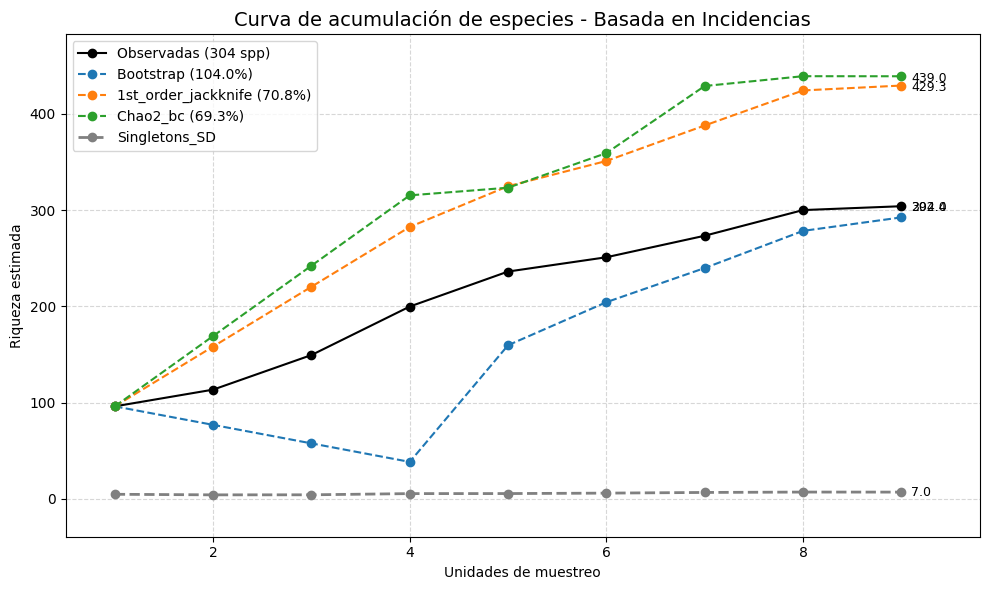

✅ Gráfica guardada correctamente.

📋 Resumen de estimadores (valores finales):
           Estimador  Individuos_estimados  Efectividad_%
          Observadas                304.00            NaN
           Bootstrap                292.40         103.97
 1st_order_jackknife                429.33          70.81
            Chao2_bc                438.97          69.25
Promedio efectividad                   NaN          81.34

✅ Archivo Excel guardado en:
D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Resumen_estimadores_Frec.xlsx
✅ Archivo leído correctamente con pandas.
🧹 Archivo reparado y guardado como:
D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Resumen_estimadores_Frec.xlsx
📘 Archivo formateado y reparado correctamente:
D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Resumen_estimadores_Frec.xlsx


In [2]:
#----------------------------------Llamar los datos de frecuencia -----------------------
#-----------------------leer el archivo formateado-----------------------#
import pandas as pd

tabla_frec = pd.read_excel(r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Estimadores_Frecuencia.xlsx")
#-------------------------Fin Dar formato al archivo Estimadores_Abundancia.xlsx-------------------------#

#-----------------------leer el archivo formateado-----------------------#
import pandas as pd
tabla_frec = pd.read_excel(r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Estimadores_Frecuencia.xlsx")

tabla_frec

names = tabla_frec.columns.tolist()
names


#-----------------------Calcular efectividad de los estimadores de abundancia-----------------------#
import pandas as pd

# --- Cargar datos ---
ruta = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Estimadores_Frecuencia.xlsx"
tabla_frec = pd.read_excel(ruta)

# --- Calcular efectividad para cada estimador ---
estimadores = ['1st_order_jackknife_Mean', '2nd_order_jackknife_Mean', 'Chao2_Chao_1987__Mean', 'Chao2_bc_Mean',
                'ICE_1_Lee_Chao_1994__Mean', 'ICE_Lee_Chao_1994__Mean', 'iChao2_Chiu_et_al_2014__Mean', 
               'Bootstrap_Mean',]  # ajusta según tus columnas reales

efectividad = pd.DataFrame()
efectividad['Unidad'] = tabla_frec['Unidad']
efectividad['Observadas_Mean'] = tabla_frec['Observadas_Mean']

for est in estimadores:
    if est in tabla_frec.columns:
        efectividad[est.replace('_Mean', '_Efectividad_%')] = (
            (tabla_frec['Observadas_Mean'] / tabla_frec[est]) * 100
        )

# --- Tomar directamente la efectividad final de cada estimador ---
# (último valor registrado en cada columna para cada estimador)
resumen = (
    efectividad
    .drop(columns=['Unidad', 'Observadas_Mean'])
    .tail(1)  # ✅ toma la última fila (la efectividad final)
    .melt(var_name='Estimador', value_name='Efectividad_Promedio_%')
    .reset_index(drop=True)
)

resumen = resumen.sort_values(by='Efectividad_Promedio_%', ascending=False)
resumen

# --- Seleccionar los dos mejores estimadores según efectividad ---
resumen = resumen.sort_values(by='Efectividad_Promedio_%', ascending=False)

import pandas as pd

# --- Agrupar por tipo de estimador y obtener el de mayor efectividad ---
resumen['Grupo'] = resumen['Estimador'].apply(
    lambda x: (
        'Chao' if 'Chao' in x else
        'ACE' if 'ACE' in x else
        'Jackknife' if 'jackknife' in x.lower() else
        'Bootstrap' if 'Bootstrap' in x else
        'ICE' if 'ICE' in x else
        'Otro'
    )
)

# --- Seleccionar el mejor (mayor efectividad) por grupo ---
mejores_por_grupo = (
    resumen.sort_values(by='Efectividad_Promedio_%', ascending=False)
           .groupby('Grupo')
           .head(1)   # uno por grupo
           .reset_index(drop=True)
)

# --- Ajustar nombres al formato de las columnas de la tabla de datos ---
top_estimadores = mejores_por_grupo['Estimador'].str.replace('_Efectividad_%', '_Mean').tolist()

resumen = pd.DataFrame(mejores_por_grupo)

print("🏆 Mejores estimadores por grupo:")
print(mejores_por_grupo[['Grupo', 'Estimador', 'Efectividad_Promedio_%']])
print("\n📊 Nombres finales para graficar:", top_estimadores)


#-----------------------Fin Calcular efectividad de los estimadores de abundancia-----------------------#
#-----------------------Guardar tabla de efectividad-----------------------#

ruta_salida = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Efectividad_Estimadores_Frec.xlsx"

with pd.ExcelWriter(ruta_salida, engine='openpyxl') as writer:
    efectividad.to_excel(writer, sheet_name='Por_Unidad', index=False)
    resumen.to_excel(writer, sheet_name='Resumen_Efectividad', index=False)

print("✅ Tabla de efectividad exportada correctamente.")

#-----------------------Fin Guardar tabla de efectividad-----------------------#
#------------------Formaterar tabla de efectividad------------------#
#---------------------------------- Reparar y formatear archivo de Resumen_estimadores_Frec -----------------------
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Alignment, Font, Border, Side
from openpyxl.utils import get_column_letter
import os

# --- Rutas ---
ruta_original = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Efectividad_Estimadores_Frec.xlsx"
ruta_limpia = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Efectividad_Estimadores_Frec.xlsx"

# --- Verificar existencia ---
if not os.path.exists(ruta_original):
    raise FileNotFoundError(f"⚠️ No se encontró el archivo: {ruta_original}")

# --- Leer archivo dañado con pandas ---
try:
    df = pd.read_excel(ruta_original)
    print("✅ Archivo leído correctamente con pandas.")
except Exception as e:
    raise RuntimeError(f"❌ No se pudo leer el archivo: {e}")

# --- Reescribir el archivo limpio ---
df.to_excel(ruta_limpia, index=False)
print(f"🧹 Archivo reparado y guardado como:\n{ruta_limpia}")

# --- Aplicar formato con openpyxl ---
from openpyxl import load_workbook

wb = load_workbook(ruta_limpia)
ws = wb.active

# --- Estilos base ---
header_fill = PatternFill(start_color='BFD8B8', end_color='BFD8B8', fill_type='solid')
header_font = Font(bold=True, color='000000', name='Calibri')
center_align = Alignment(horizontal='center', vertical='center', wrap_text=True)
thin_border = Border(
    left=Side(style='thin', color='000000'),
    right=Side(style='thin', color='000000'),
    top=Side(style='thin', color='000000'),
    bottom=Side(style='thin', color='000000')
)

# --- Aplicar formato y reemplazar vacíos ---
for row in ws.iter_rows():
    for cell in row:
        if cell.value is None or str(cell.value).strip() == '':
            cell.value = '-'
        cell.alignment = center_align
        cell.border = thin_border

# --- Encabezado ---
for cell in ws[1]:
    cell.fill = header_fill
    cell.font = header_font
    cell.alignment = center_align

# --- Ajustar ancho de columnas ---
for col in ws.columns:
    max_length = 0
    column = get_column_letter(col[0].column)
    for cell in col:
        if cell.value:
            length = len(str(cell.value))
            if length > max_length:
                max_length = length
    ws.column_dimensions[column].width = max_length + 3

# --- Ajustar altura de filas ---
for row in ws.iter_rows():
    ws.row_dimensions[row[0].row].height = 18

# --- Guardar cambios ---
wb.save(ruta_limpia)
print(f'📘 Archivo formateado y reparado correctamente:\n{ruta_limpia}')
#------------------Fin Formaterar tabla de efectividad------------------#
#-----------------------Graficar curvas de acumulacion de especies-----------------------#
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Escoger los dos mejores estimadores ---
top2 = resumen['Estimador'].head(3).str.replace('_Efectividad_%', '_Mean').tolist()
print("📊 Mejores estimadores:", top2)

# --- Crear figura ---
fig, ax = plt.subplots(figsize=(10, 6))

# Eje X dinámico según número de unidades
x = np.arange(1, len(tabla_frec) + 1)

# --- Función automática de etiquetado sin solapamientos ---
etiquetas_previas = []

def colocar_etiqueta_automatica(x_val, y_val, texto, ax):
    ymin, ymax = ax.get_ylim()
    offset = (ymax - ymin) * 0.05
    for y_prev in etiquetas_previas:
        if abs(y_prev - y_val) < offset:
            y_val += offset
    etiquetas_previas.append(y_val)
    y_val = np.clip(y_val, ymin + offset, ymax - offset)
    x_val = min(x_val, ax.get_xlim()[1] - 0.5)
    ax.text(x_val + 0.2, y_val, f"{float(texto):.1f}",
            fontsize=9, ha='left', va='center', color='black')


# 🔹 1️⃣ Agrega este bloque justo antes de graficar “Observadas”
# Calcula el número total observado
n_obs = int(tabla_frec['Observadas_Mean'].iloc[-1])

# --- Dibujar observadas ---
# 🔹 2️⃣ Cambia solo la etiqueta del label:
ax.plot(x, tabla_frec['Observadas_Mean'], 'o-', color='black',
        label=f"Observadas ({n_obs} spp)")
colocar_etiqueta_automatica(x[-1], tabla_frec['Observadas_Mean'].iloc[-1],
                            tabla_frec['Observadas_Mean'].iloc[-1], ax)


# --- Dibujar los dos mejores estimadores ---
# 🔹 3️⃣ Aquí agregas la búsqueda de efectividad para cada estimador:
for est in top2:
    est_base = est.replace('_Mean', '_Efectividad_%')
    efectividad = resumen.loc[resumen['Estimador'] == est_base, 'Efectividad_Promedio_%'].values
    ef_txt = f" ({efectividad[0]:.1f}%)" if len(efectividad) > 0 else ""

    # 🔹 4️⃣ Modifica el label para que incluya la efectividad
    ax.plot(x, tabla_frec[est], 'o--', label=est.replace('_Mean', '') + ef_txt)
    colocar_etiqueta_automatica(x[-1], tabla_frec[est].iloc[-1],
                                tabla_frec[est].iloc[-1], ax)


# --- Dibujar desviación estándar de Singletons ---
if 'Singletons_SD' in tabla_frec.columns:
    ax.plot(x, tabla_frec['Singletons_SD'], 'o--', color='gray', linewidth=2,
            label='Singletons_SD')
    colocar_etiqueta_automatica(x[-1], tabla_frec['Singletons_SD'].iloc[-1],
                                tabla_frec['Singletons_SD'].iloc[-1], ax)


# --- Ajustes automáticos del gráfico ---
ax.set_xlim(0.5, len(x) + 0.8)
ax.margins(y=0.1)
plt.title("Curva de acumulación de especies - Basada en Incidencias", fontsize=14)
plt.xlabel("Unidades de muestreo")
plt.ylabel("Riqueza estimada")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
#-----------------------Fin Ajustes automáticos del gráfico -----------------------#

# --- Guardar la gráfica en formato PNG ---
fig.savefig("D:/CORPONOR 2025/Backet/python_Proyect/Resultados/estimadores_riqueza_Frec.png",
            dpi=300, bbox_inches='tight', transparent=False)
print("✅ Gráfica guardada correctamente.")

#-----------------------Fin Graficar curvas de acumulacion de especies-----------------------#

#-----------------------Crear tabla resumen de estimadores-----------------------#
import pandas as pd

# --- Crear tabla resumen de efectividad ---
datos_tabla = []

# Valor observado final
obs_final = tabla_frec['Observadas_Mean'].iloc[-1]
datos_tabla.append({
    "Estimador": "Observadas",
    "Individuos_estimados": obs_final,
    "Efectividad_%": None  # sin porcentaje
})

# Los estimadores del gráfico (automático según top2)
efectividades = []
for est in top2:
    valor_final = tabla_frec[est].iloc[-1]
    # 🔹 Porcentaje de representatividad del observado respecto al estimado
    efectividad = (obs_final / valor_final) * 100
    efectividades.append(efectividad)
    datos_tabla.append({
        "Estimador": est.replace('_Mean', ''),
        "Individuos_estimados": valor_final,
        "Efectividad_%": efectividad
    })

# Agregar fila de promedio de efectividad
promedio_efectividad = sum(efectividades) / len(efectividades)
datos_tabla.append({
    "Estimador": "Promedio efectividad",
    "Individuos_estimados": None,
    "Efectividad_%": promedio_efectividad
})

# Convertir a DataFrame
tabla_resumen = pd.DataFrame(datos_tabla)

# --- Mostrar con formato redondeado ---
print("\n📋 Resumen de estimadores (valores finales):")
print(tabla_resumen.round(2).to_string(index=False))

# --- Guardar en Excel ---
ruta_salida = "D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Resumen_estimadores_Frec.xlsx"
tabla_resumen.to_excel(ruta_salida, index=False)

print(f"\n✅ Archivo Excel guardado en:\n{ruta_salida}")

#-----------------------Fin Crear tabla resumen de estimadores-----------------------#
#---------------------------------- Reparar y formatear archivo de Resumen_estimadores_Frec -----------------------
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Alignment, Font, Border, Side
from openpyxl.utils import get_column_letter
import os

# --- Rutas ---
ruta_original = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Resumen_estimadores_Frec.xlsx"
ruta_limpia = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Resumen_estimadores_Frec.xlsx"

# --- Verificar existencia ---
if not os.path.exists(ruta_original):
    raise FileNotFoundError(f"⚠️ No se encontró el archivo: {ruta_original}")

# --- Leer archivo dañado con pandas ---
try:
    df = pd.read_excel(ruta_original)
    print("✅ Archivo leído correctamente con pandas.")
except Exception as e:
    raise RuntimeError(f"❌ No se pudo leer el archivo: {e}")

# --- Reescribir el archivo limpio ---
df.to_excel(ruta_limpia, index=False)
print(f"🧹 Archivo reparado y guardado como:\n{ruta_limpia}")

# --- Aplicar formato con openpyxl ---
from openpyxl import load_workbook

wb = load_workbook(ruta_limpia)
ws = wb.active

# --- Estilos base ---
header_fill = PatternFill(start_color='BFD8B8', end_color='BFD8B8', fill_type='solid')
header_font = Font(bold=True, color='000000', name='Calibri')
center_align = Alignment(horizontal='center', vertical='center', wrap_text=True)
thin_border = Border(
    left=Side(style='thin', color='000000'),
    right=Side(style='thin', color='000000'),
    top=Side(style='thin', color='000000'),
    bottom=Side(style='thin', color='000000')
)

# --- Aplicar formato y reemplazar vacíos ---
for row in ws.iter_rows():
    for cell in row:
        if cell.value is None or str(cell.value).strip() == '':
            cell.value = '-'
        cell.alignment = center_align
        cell.border = thin_border

# --- Encabezado ---
for cell in ws[1]:
    cell.fill = header_fill
    cell.font = header_font
    cell.alignment = center_align

# --- Ajustar ancho de columnas ---
for col in ws.columns:
    max_length = 0
    column = get_column_letter(col[0].column)
    for cell in col:
        if cell.value:
            length = len(str(cell.value))
            if length > max_length:
                max_length = length
    ws.column_dimensions[column].width = max_length + 3

# --- Ajustar altura de filas ---
for row in ws.iter_rows():
    ws.row_dimensions[row[0].row].height = 18

# --- Guardar cambios ---
wb.save(ruta_limpia)
print(f'📘 Archivo formateado y reparado correctamente:\n{ruta_limpia}')


# Diversidad alfa
Para este análisis se utilizó R Studio y Python con el fin de realiza los análisis de dominancia de Simpson, equitatividad de Pielou y diversidad de Shannon), los cuales nos indican la diversidad de especies de una comunidad particular a la que consideramos homogénea.

# Riqueza de especies.

Para el presente estudio, la diversidad o riqueza de especies es definida como el número de especies en la zona de estudio, de este modo, y con el fin de hacer una determinación gráfica, se discriminó la totalidad de especies registrados en jerarquías taxonómicas (Orden, Familia, Género, Especie), con el objetivo de identificar el grado de representatividad de cada una.


## Índice de Simpson (Ds)
Expresa la probabilidad de extraer de la comunidad dos (2) individuos capturados al azar que pertenezcan a la misma especie. Es una medida de cuan dominante es una especie, de esta manera las especies comunes tiene mucho peso respecto a las especies raras. Oscila entre 0 y (1-1/S.

## Índice de Shannon (H´)
El índice de Shannon-Wiener es uno de los índices de medida más simples y de uso más extenso, que mide el grado promedio de incertidumbre para predecir la especie a la que pertenece un individuo dado, elegido al azar dentro de la comunidad. Mide la variedad de especies de un área determinada, indicando su diversidad y frecuencia; una alta diversidad indica un alto grado de desarrollo y estabilidad de la biota; se basa en la abundancia proporcional de las especies como en su riqueza; se incrementa con el número de especies y el número de individuos.

## Índice de equitatividad de Pielou (J)
El Índice de equitatividad de Pielou (J’) mide la proporción de la diversidad observada con relación a la máxima diversidad esperada. Su valor va de cero a uno de forma que uno corresponde a situaciones donde todas las especies son igualmente abundantes. Esta medida al igual que Shannon considera que todas las especies de la comunidad se han contabilizado en la muestra.


#### Crear tabla de indices de diversidad por cobertura y generar analisis automatico descriptivo

In [7]:
!pip install python-docx


  Using cached python_docx-1.2.0-py3-none-any.whl.metadata (2.0 kB)
  Using cached lxml-6.0.2-cp314-cp314-win_amd64.whl.metadata (3.7 kB)
Using cached python_docx-1.2.0-py3-none-any.whl (252 kB)
Using cached lxml-6.0.2-cp314-cp314-win_amd64.whl (4.1 MB)

   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   -------------------- ------------------- 1/2 [python-docx]
   -------------------- ------------------- 1/2 [python-docx]
   -------------------- ------------------- 1/2 [python-docx]
   -------------------- ------------------- 1/2 [python-docx]
   -------------------- ------------------- 1/2 [python-docx]
   -------------------- ------------------- 1/2 [python-docx]
   -------------------- ------------------- 1/2 [python-docx]
   -------------------- ------------------- 1/2 [python-docx]
   -------------------- -----


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
%pip install --upgrade pip


  Using cached pip-25.3-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.3-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
#--------------## Cargar librerias necesarias------------------------------
# Si no las tienes instaladas, ejecuta esta celda una vez:
# Salir del interprete con: exit() exit() python   pip install tabulate pandas numpy scipy scikit-bio openpyxl
#
# !pip install pandas numpy matplotlib tabulate openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import openpyxl

#--------------## Leer archivo y revisar columnas------------------------------
# Ruta del archivo
ruta = r"D:\CORPONOR 2025\Backet\python_Proyect\data\POF_ZULIA_2025_BD_AVES_MAMIFEROS.xlsx"

# Leer el archivo Excel
Registros = pd.read_excel(ruta)

# Mostrar las primeras filas
print("📄 Primeras filas del archivo:")
print(Registros.head())

# Mostrar nombres de las columnas
print("\n📋 Columnas del DataFrame:")
print(Registros.columns)

#------------------------------## Crear matriz de abundancia------------------------------

#------------------------------Calcular indices de diversidad------------------------------
import re

def generar_abreviacion(nombre):
    """
    Genera abreviaciones automáticas a partir de nombres de coberturas.
    Ejemplo: 'Bosque de galería y ripario' → 'Bgr'
    """
    # Convertir a minúsculas y dividir en palabras
    palabras = nombre.lower().split()

    # Eliminar conectores comunes
    palabras = [p for p in palabras if p not in ['de', 'del', 'la', 'el', 'y', 'con', 'en', 'los', 'las']]

    # Tomar la primera letra de cada palabra
    abreviacion = ''.join([p[0] for p in palabras])

    # Asegurar que tenga al menos 3 caracteres (rellena si es corta)
    if len(abreviacion) < 3:
        abreviacion = abreviacion.ljust(3, '_')

    return abreviacion.capitalize()


def abreviar_coberturas(df, columna='COBERTURA'):
    """
    Crea un diccionario de abreviaciones y reemplaza los nombres en el DataFrame.
    """
    coberturas_unicas = df[columna].unique()
    abreviaciones = {c: generar_abreviacion(c) for c in coberturas_unicas}

    print("🔤 Abreviaciones generadas automáticamente:")
    for original, abrev in abreviaciones.items():
        print(f"  {original} → {abrev}")

    # Reemplazar en el DataFrame
    df[columna] = df[columna].replace(abreviaciones)

    return df, abreviaciones


# --- Aplicar las abreviaciones en el DataFrame ---
Registros, abreviaciones_cobertura = abreviar_coberturas(Registros, columna='COBERTURA')

print("✅ Abreviaciones aplicadas a la columna 'COBERTURA':")
print(Registros['COBERTURA'].unique())


import pandas as pd
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

# --- 1. Crear matriz de abundancia por cobertura ---
matriz_abundancia = Registros.pivot_table(
    index='COBERTURA',
    columns='ESPECIE',
    values='INDIVIDUOS',
    aggfunc='sum',
    fill_value=0
)

print("✅ Matriz de abundancia creada:")
print(matriz_abundancia.head())

import numpy as np
import pandas as pd
from skbio.diversity.alpha import shannon, simpson
from math import log, sqrt

# --- 1. Función para calcular índices ecológicos con scikit-bio ---
def calcular_indices_skbio(abundancias):
    abundancias = np.array(abundancias)
    N = abundancias.sum()
    S = np.count_nonzero(abundancias)
    
    if N == 0 or S == 0:
        return {
            'Riqueza (S)': 0,
            'Abundancia (N)': 0,
            "Shannon (H')": 0,
            'Simpson (1-D)': 0,
            'Dominancia (D)': 0,
            "Equidad (J')": 0,
            'Margalef (DMg)': 0,
            'Menhinick (DMn)': 0
        }

    # Índices calculados con scikit-bio
    H = shannon(abundancias, base=np.e)         # Diversidad de Shannon (H’)
    D_simpson = simpson(abundancias)            # Dominancia de Simpson (D)
    one_minus_D = 1 - D_simpson                 # Diversidad de Simpson (1 - D)

    # Índices clásicos adicionales
    J = H / log(S)                              # Equidad de Pielou (J’)
    DMg = (S - 1) / log(N)                      # Índice de Margalef
    DMn = S / sqrt(N)                           # Índice de Menhinick

    return {
        'Riqueza (S)': S,
        'Abundancia (N)': N,
        "Shannon (H')": H,
        'Simpson (1-D)': one_minus_D,
        'Dominancia (D)': D_simpson,
        "Equidad (J')": J,
        'Margalef (DMg)': DMg,
        'Menhinick (DMn)': DMn
    }

# --- 2. Aplicar la función por cobertura ---
calcular_indices = calcular_indices_skbio

indices_diversidad = matriz_abundancia.apply(calcular_indices, axis=1, result_type='expand')

print("\n📊 Índices de diversidad por cobertura (basados en scikit-bio):")
print(indices_diversidad)



# --- 4. Calcular índices totales (todas las coberturas combinadas) ---
abundancia_total = matriz_abundancia.sum(axis=0)
indices_totales = calcular_indices(abundancia_total)

print("\n🌍 Índices de diversidad total (todas las coberturas combinadas):")
for k, v in indices_totales.items():
    print(f"{k}: {v:.4f}")

# Convertir los índices totales a DataFrame
indices_totales_df = pd.DataFrame([indices_totales], index=['Total'])


# Combinar ambos DataFrames
indices_combinados = pd.concat([indices_diversidad, indices_totales_df])

print("📊 Tabla combinada de índices de diversidad:")
print(indices_combinados)

indices_combinados = indices_combinados.round(4)
print("📊 Tabla combinada de índices de diversidad (redondeada):")
print(indices_combinados)

indices_pivot = indices_combinados.T
indices_pivot.index.name = 'Índice'
indices_pivot.columns.name = 'Cobertura'

print(indices_pivot)



indices_pivot.to_excel("D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Indices_Diversidad_Combinados.xlsx")
# Confirmar la ubicación del archivo guardado
print(f"✅ Archivo exportado correctamente en:\nD:/CORPONOR 2025/Backet/python_Proyect/Resultados/Indices_Diversidad_Combinados.xlsx")

#--------------------Formatear grafica--------------------

#---------------------------------- Reparar y formatear archivo de Indices_Diversidad_Combinados -----------------------
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Alignment, Font, Border, Side
from openpyxl.utils import get_column_letter
import os

# --- Rutas ---
ruta_original = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Indices_Diversidad_Combinados.xlsx"
ruta_limpia = r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Indices_Diversidad_Combinados.xlsx"

# --- Verificar existencia ---
if not os.path.exists(ruta_original):
    raise FileNotFoundError(f"⚠️ No se encontró el archivo: {ruta_original}")

# --- Leer archivo dañado con pandas ---
try:
    df = pd.read_excel(ruta_original)
    print("✅ Archivo leído correctamente con pandas.")
except Exception as e:
    raise RuntimeError(f"❌ No se pudo leer el archivo: {e}")

# --- Reescribir el archivo limpio ---
df.to_excel(ruta_limpia, index=False)
print(f"🧹 Archivo reparado y guardado como:\n{ruta_limpia}")

# --- Aplicar formato con openpyxl ---
from openpyxl import load_workbook

wb = load_workbook(ruta_limpia)
ws = wb.active

# --- Estilos base ---
header_fill = PatternFill(start_color='BFD8B8', end_color='BFD8B8', fill_type='solid')
header_font = Font(bold=True, color='000000', name='Calibri')
center_align = Alignment(horizontal='center', vertical='center', wrap_text=True)
thin_border = Border(
    left=Side(style='thin', color='000000'),
    right=Side(style='thin', color='000000'),
    top=Side(style='thin', color='000000'),
    bottom=Side(style='thin', color='000000')
)

# --- Aplicar formato y reemplazar vacíos ---
for row in ws.iter_rows():
    for cell in row:
        if cell.value is None or str(cell.value).strip() == '':
            cell.value = '-'
        cell.alignment = center_align
        cell.border = thin_border

# --- Encabezado ---
for cell in ws[1]:
    cell.fill = header_fill
    cell.font = header_font
    cell.alignment = center_align

# --- Ajustar ancho de columnas ---
for col in ws.columns:
    max_length = 0
    column = get_column_letter(col[0].column)
    for cell in col:
        if cell.value:
            length = len(str(cell.value))
            if length > max_length:
                max_length = length
    ws.column_dimensions[column].width = max_length + 3

# --- Ajustar altura de filas ---
for row in ws.iter_rows():
    ws.row_dimensions[row[0].row].height = 18

# --- Guardar cambios ---
wb.save(ruta_limpia)
print(f'📘 Archivo formateado y reparado correctamente:\n{ruta_limpia}')

#-------------Fin del formateo del archivo----------------------------
#---------------------------Interpreetar tabla de Indices de diversidad---------------------------
import pandas as pd
import numpy as np

def clasificar_indice(valor, rangos):
    """Clasifica un valor numérico según los rangos definidos."""
    for categoria, (minv, maxv) in rangos.items():
        if minv <= valor < maxv:
            return categoria
    return "Fuera de rango"

def interpretar_indices_completo(df):
    """
    Interpreta automáticamente una tabla de índices ecológicos.
    Incluye descripción de cada índice, su interpretación y nivel (bajo, medio, alto).
    Filas = índices, columnas = coberturas (la última puede ser 'Total').
    """
    interpretaciones = []
    
    # --- Rangos ecológicos generales ---
    rangos_dict = {
        "Shannon": {"Baja": (0, 2), "Media": (2, 3.5), "Alta": (3.5, 100)},
        "Simpson": {"Baja": (0, 0.8), "Media": (0.8, 0.95), "Alta": (0.95, 1.01)},
        "Dominancia": {"Alta": (0.1, 1), "Media": (0.05, 0.1), "Baja": (0, 0.05)},
        "Equidad": {"Baja": (0, 0.6), "Media": (0.6, 0.8), "Alta": (0.8, 1.01)},
        "Margalef": {"Baja": (0, 5), "Media": (5, 15), "Alta": (15, 100)},
        "Menhinick": {"Baja": (0, 2), "Media": (2, 4), "Alta": (4, 100)}
    }

    # --- Descripciones breves de cada índice ---
    descripciones = {
        "Riqueza": "El índice de **riqueza (S)** representa el número total de especies registradas en una cobertura. No considera la abundancia, solo cuántas especies hay.",
        "Abundancia": "La **abundancia (N)** refleja el número total de individuos registrados; una alta abundancia puede indicar hábitats más productivos o mejor muestreados.",
        "Shannon": "El índice de **Shannon (H’)** mide la diversidad teniendo en cuenta tanto la riqueza de especies como su equidad. Valores altos indican comunidades más diversas y equilibradas.",
        "Simpson": "El índice de **Simpson (1–D)** expresa la probabilidad de que dos individuos seleccionados al azar pertenezcan a especies diferentes. Valores cercanos a 1 reflejan alta diversidad.",
        "Dominancia": "El índice de **Dominancia (D)** mide el grado en que una o pocas especies dominan el ensamblaje. Valores altos indican dominancia de pocas especies.",
        "Equidad": "La **equidad (J’)** describe cuán uniformemente se distribuyen los individuos entre las especies. Valores altos indican distribución equitativa.",
        "Margalef": "El índice de **Margalef (DMg)** ajusta la riqueza de especies en función del número de individuos, útil para comparar entre coberturas con distinto esfuerzo de muestreo.",
        "Menhinick": "El índice de **Menhinick (DMn)** también ajusta la riqueza según la abundancia total, proporcionando una medida estandarizada de riqueza relativa."
    }

    # --- Copia de seguridad del DataFrame ---
    datos = df.copy()
    
    # Identificar la columna de Totales si existe
    col_total = None
    for col in datos.columns:
        if "total" in col.lower():
            col_total = col
            break
    
    coberturas = [c for c in datos.columns if c != col_total]

    # --- Interpretación por índice ---
    for indice in datos.index:
        nombre_limpio = indice.split(" ")[0].replace("(", "").replace(")", "")
        valores = datos.loc[indice, coberturas]

        if np.issubdtype(valores.dtype, np.number):
            cobertura_max = valores.idxmax()
            cobertura_min = valores.idxmin()
            val_max = valores.max()
            val_min = valores.min()

            # --- Descripción ---
            tipo = next((k for k in rangos_dict.keys() if k.lower() in nombre_limpio.lower()), None)
            desc = next((v for k, v in descripciones.items() if k.lower() in nombre_limpio.lower()), None)
            if not desc:
                desc = f"El índice **{indice}** evalúa un aspecto ecológico particular del ensamblaje de especies."

            interpretaciones.append(f"\n📘 {desc}")

            # --- Clasificación ---
            if tipo:
                nivel_max = clasificar_indice(val_max, rangos_dict[tipo])
                nivel_min = clasificar_indice(val_min, rangos_dict[tipo])
                interpretaciones.append(
                    f"🔹 En este índice, la cobertura con valor más alto es **{cobertura_max}** "
                    f"({val_max:.3f}, categoría {nivel_max.lower()}) y la más baja es **{cobertura_min}** "
                    f"({val_min:.3f}, categoría {nivel_min.lower()})."
                )
            else:
                interpretaciones.append(
                    f"🔹 La cobertura con mayor valor de **{indice}** es **{cobertura_max}** "
                    f"({val_max:.3f}), mientras que la más baja es **{cobertura_min}** ({val_min:.3f})."
                )

    # --- Interpretación general ---
    interpretaciones.append("\n🧩 **Síntesis ecológica general:**")
    interpretaciones.append(
        "Altos valores en los índices de **Shannon** y **Simpson** reflejan comunidades con gran diversidad y "
        "una distribución equilibrada de individuos entre especies. "
        "En contraste, valores altos de **Dominancia** indican concentración de abundancia en pocas especies. "
        "Los índices de **Equidad** expresan el grado de uniformidad en la distribución de individuos, "
        "mientras que **Margalef** y **Menhinick** complementan la evaluación de la riqueza relativa ajustada por abundancia."
    )

    if col_total:
        interpretaciones.append(
            f"\n📊 Finalmente, la columna **{col_total}** resume los valores combinados del conjunto total de coberturas, "
            "brindando una visión general de la diversidad del ecosistema muestreado."
        )

    return "\n".join(interpretaciones)


# --- Ejemplo de uso ---
interpretacion = interpretar_indices_completo(indices_pivot)
print(interpretacion)

#----------------------------Crear informe W0rd----------------------------
#pip install python-docx
from docx import Document
from docx.shared import Inches

# --- 2️⃣ Crear documento Word ---
ruta_salida = "D:/CORPONOR 2025/Backet/python_Proyect/Resultados/Interpretacion_Indices_Diversidad.docx"
doc = Document()

# --- Título principal ---
doc.add_heading("Informe de Índices de Diversidad", level=1)

# --- Subtítulo ---
doc.add_heading("Tabla de Índices Calculados", level=2)

# --- 3️⃣ Insertar la tabla en el documento ---
tabla = doc.add_table(rows=1, cols=len(indices_pivot.columns) + 1)
tabla.style = 'Table Grid'

# --- Encabezados ---
hdr_cells = tabla.rows[0].cells
hdr_cells[0].text = "Índice"
for i, col in enumerate(indices_pivot.columns):
    hdr_cells[i + 1].text = col

# --- Filas con datos ---
for idx, row in indices_pivot.iterrows():
    row_cells = tabla.add_row().cells
    row_cells[0].text = str(idx)
    for j, valor in enumerate(row):
        row_cells[j + 1].text = f"{valor:.4f}" if isinstance(valor, (float, int)) else str(valor)

# --- 4️⃣ Espacio y título para la interpretación ---
doc.add_paragraph("\n")
doc.add_heading("Interpretación Automática de los Resultados", level=2)
doc.add_paragraph(interpretacion)

# --- 5️⃣ Guardar archivo ---
doc.save(ruta_salida)
print(f"✅ Archivo con tabla e interpretación guardado en:\n{ruta_salida}")


#----------------------------Fin del codigo----------------------------

#------------------Validar calculos con scikit-bio------------------------------
 # --- 2. Función para calcular índices ecológicos ---
def calcular_indices(abundancias):
    abundancias = np.array(abundancias)
    N = abundancias.sum()
    S = np.count_nonzero(abundancias)
    
    if N == 0 or S == 0:
        return {
            'Riqueza (S)': 0,
            'Abundancia (N)': 0,
            'Shannon (H\')': 0,
            'Simpson (1-D)': 0,
            'Dominancia (D)': 0,
            'Equidad (J\')': 0,
            'Margalef (DMg)': 0,
            'Menhinick (DMn)': 0
        }

    # Proporciones
    p = abundancias / N

    # Índices de diversidad
    shannon = entropy(p, base=np.e)
    simpson = 1 - np.sum(p**2)
    dominancia = np.sum(p**2)
    pielou = shannon / np.log(S)
    margalef = (S - 1) / np.log(N)
    menhinick = S / np.sqrt(N)

    return {
        'Riqueza (S)': S,
        'Abundancia (N)': N,
        'Shannon (H\')': shannon,
        'Simpson (1-D)': simpson,
        'Dominancia (D)': dominancia,
        'Equidad (J\')': pielou,
        'Margalef (DMg)': margalef,
        'Menhinick (DMn)': menhinick
    }

# --- 3. Calcular índices por cobertura ---
indices_diversidad2 = matriz_abundancia.apply(calcular_indices, axis=1, result_type='expand')

print("\n📊 Índices de diversidad por cobertura:")
print(indices_diversidad2)

# assumes matriz_abundancia: rows=coberturas, cols=especies (enteros)
from skbio.diversity import alpha_diversity
import numpy as np
from scipy.stats import entropy

# preparar datos
counts = matriz_abundancia.values  # array shape (n_samples, n_species)
ids = matriz_abundancia.index.astype(str).tolist()

# calcular con scikit-bio
shannon_skbio = alpha_diversity('shannon', counts, ids=ids)   # devuelve H' (base e)
simpson_skbio = alpha_diversity('simpson', counts, ids=ids)   # ojo: devuelve D = sum p^2 en algunas versiones

# calcular con tu implementación (ejemplo para Shannon y Simpson 1-D)
shannon_manual = matriz_abundancia.apply(lambda row: entropy(row / row.sum(), base=np.e), axis=1)
simpson_manual = matriz_abundancia.apply(lambda row: 1 - np.sum((row / row.sum())**2), axis=1)

# comparar (tolerancia numérica)
print("Shannon equal:", np.allclose(shannon_manual.values, shannon_skbio.values, atol=1e-8))
# Para Simpson, comprobar si scikit-bio devuelve D o 1-D:
print("Simpson manual sample:", simpson_manual.iloc[0])
print("Simpson scikit-bio sample:", simpson_skbio.values[0])
# Si scikit-bio devuelve D = sum p^2, entonces 1 - simpson_skbio == simpson_manual



📄 Primeras filas del archivo:
  CLASE                  ESPECIE                       SACC  INDIVIDUOS  \
0  AVES          Tyrannus savana     Fork-tailed Flycatcher         2.0   
1  AVES    Molothrus bonariensis              Shiny Cowbird         4.0   
2  AVES         Buteo brachyurus          Short-tailed Hawk         2.0   
3  AVES    Parabuteo leucorrhous          White-rumped Hawk         1.0   
4  AVES  Saucerottia saucerottei  Steely-vented Hummingbird         3.0   

  Conglomerado METODOLOGIA     METODO                 ID  Hora_Hombre  \
0          C10    Auditivo  Transecto  AM-C10-BDA-ARB-T1          6.0   
1          C10  Fotografia  Transecto  AM-C10-BDA-ARB-T1          6.0   
2          C11    Auditivo  Transecto  AM-C11-BDB-BOC-T1          6.0   
3          C11    Auditivo  Transecto  AM-C11-BDB-BOC-T1          6.0   
4          C11  Fotografia  Transecto  AM-C11-BDB-BOC-T1          6.0   

   MUNICIPIO  ...                            Autor  \
0  ARBOLEDAS  ...         

### Ver tabla de indices de diversidad

In [9]:
import pandas as pd
from IPython.display import display, HTML

# --- Leer el archivo Excel ---
# 👇 Usa una cadena RAW (r"...") para evitar errores con las barras invertidas
tabla = pd.read_excel(r"D:\CORPONOR 2025\Backet\python_Proyect\Resultados\Indices_Diversidad_Combinados.xlsx")

# --- Mostrar tabla con desplazamiento vertical ---
display(HTML(f"""
<h3>Vista del archivo <code>Indices_Diversidad_Combinados.xlsx</code></h3>
<div style="
    height: 400px;
    overflow-y: scroll;
    border: 1px solid #ccc;
    padding: 8px;
    font-size: 14px;
">
{tabla.to_html(index=False)}
</div>
"""))

Índice,Bdatf,Bdbtf,Bfvs,Bgr,Total
Riqueza (S),245.0000,166.0000,69.0000,56.0000,304.0000
Abundancia (N),1769.0000,825.0000,251.0000,170.0000,3015.0000
Shannon (H'),4.9374,4.7515,3.9249,3.7738,5.0428
Simpson (1-D),0.9887,0.9886,0.9735,0.9711,0.9896
Dominancia (D),0.0113,0.0114,0.0265,0.0289,0.0104
Equidad (J'),0.8975,0.9295,0.9270,0.9375,0.8821
Margalef (DMg),32.6283,24.5705,12.3067,10.7091,37.8213
Menhinick (DMn),5.8251,5.7794,4.3552,4.2950,5.5364


# Falta agregar una parte de comparativa, un indice de similitud entre coberturas por analisis, o que compare la cobertura con mayor diversidad y así 
 

## Curvas rango abundancia
Las curvas rango-abundancia se emplearon para comparar la distribución de la abundancia y la uniformidad de las especies entre las diferentes unidades de muestreo. Este tipo de representación permite visualizar tanto la riqueza específica (a partir de la longitud del eje de rango) como la dominancia o equidad en la abundancia de las especies (según la pendiente de la curva). Para facilitar la interpretación y reducir la asimetría de los datos, los valores de abundancia fueron transformados mediante una escala logarítmica de base 10 (log₁₀), lo que permite representar de manera proporcional las diferencias entre especies comunes y raras. Estas curvas son ampliamente utilizadas en estudios de caracterización y estructura de comunidades biológicas, ya que permiten evaluar la composición y el grado de dominancia de los taxones en los distintos hábitats o coberturas analizadas.

## Uso de habitat
Para el análisis del uso de hábitat, se contabilizó el número total de especies registradas en cada cobertura, así como aquellas consideradas exclusivas, es decir, presentes únicamente en una de ellas. Este enfoque permite identificar la representatividad y afinidad de las especies con cada tipo de hábitat, facilitando la comparación de la riqueza y la singularidad biológica entre unidades de muestreo. Las coberturas con mayor número de especies indican una mayor diversidad estructural y funcional del hábitat, mientras que aquellas con un número elevado de especies exclusivas reflejan condiciones particulares que favorecen la presencia de taxones especializados o con requerimientos ecológicos específicos. En conjunto, este análisis ofrece una visión integral sobre cómo las especies utilizan los distintos ambientes disponibles y permite inferir la importancia relativa de cada cobertura en la conservación de la diversidad local.

## Gremios tróficos
Los gremios tróficos se definieron como omnívoro (consumo de material vegetal, animal y alimentos procesados), Insectívoro (consumo de insectos), Folívoro (consumo de hojas), Granívoro (consumo de granos y semillas), Herbívoro (consumo de vegetales), Hematófagos (consumo de sangre), Frugívoro (consumo de frutos), carnívoro (consumo de carne de otros animales), Nectarívoro (consumo del néctar de las flores), Piscívoro (consumo de peces) y Carroñero (consumo de cadáveres de animales). La caracterización trófica, se realizó en base a los resultados de abundancia relativa, para facilitar la cuantificación de la misma.


# Especies de importancia económica y cultural

## Especies sensibles
Posterior a esto, se evaluaron las especies sensibles, Estas especies se reconocen como todas aquellas que, debido a alguna característica ecológica o poblacional, son más perceptivas al cambio ambiental que producen las actividades antrópicas. A partir de esto, fueron analizadas aquellas especies que han sido catalogadas como amenazadas de extinción, para lo cual se tuvieron en cuenta las categorías establecidas a nivel global por la Unión Internacional para la Conservación de la Naturaleza UICN (2021), y a nivel nacional por la Resolución 0126 de 2024 del MADS. Así mismo, se analizaron aquellas especies que presentan restricción en su comercio a través de la lista de la Convención sobre el Comercio Internacional de Especies Amenazadas de Fauna y Flora Silvestres (CITES), aquellas que tuvieran rangos de distribución muy pequeños o restringidos (endémicas) y las especies con algún patrón de migración dentro del territorio, para lo cual fue evaluado el Plan Nacional de especies Migratorias de Naranjo y Amaya y Naranjo et al.   y la Guía de las especies migratorias de la biodiversidad en Colombia de Amaya-Espinel y Zapata.

### UICN

Siguiendo los criterios establecidos por la Unión Internacional para la Conservación de la naturaleza (IUCN), las categorías de amenaza han sido definidas como:

En Peligro Crítico (CR): en esta categoría se incluyen las especies que enfrentan un riesgo extremadamente alto de extinción en estado silvestre, en el futuro inmediato.

En Peligro (EN): esta categoría incluye las especies que no están en “peligro crítico”, pero están enfrentando un muy alto riesgo de extinción o deterioro poblacional en estado silvestre, en el futuro cercano.

Vulnerables (VU): un taxón está en la categoría de VU, cuando la mejor evidencia disponible indica que enfrenta un moderado riesgo de extinción o deterioro poblacional a mediano plazo.

### CITES

Las especies amparadas por la Convención sobre el Comercio Internacional de Especies Amenazadas de Fauna y Flora Silvestres (CITES), se encuentran incluidas en tres apéndices según el grado de protección que necesiten, los cuales se describen a continuación:

Apéndice I: Incluye todas las especies en peligro de extinción, y el comercio de esas especies se autorizará solamente bajo circunstancias excepcionales. 

Apéndice II: Incluye las especies que no se encuentran necesariamente en peligro de extinción, pero cuyo comercio debe controlarse a fin de evitar una utilización incompatible con su supervivencia. 

Apéndice III: Incluye especies que están protegidas al menos en un país, el cual ha solicitado la asistencia de otras partes de las CITES para controlar su comercio.


Los análisis y gráficos se realizaron con los softwares libres R Studio, Python y una hoja de cálculo de Microsoft Excel. 